In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self):
        super(MLPClassifier, self).__init__()
        # Define the layers of the MLP
        self.fc1 = nn.Linear(3, 100)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(100, 50)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50, 2)

    def forward(self, x):
        # Define the forward pass of the network
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return F.softmax(x, dim=1)


In [ ]:
model = MLPClassifier()


In [ ]:
import tensorflow as tf

class MLPClassifier(tf.keras.Model):
    def __init__(self):
        super(MLPClassifier, self).__init__()
        self.fc1 = tf.keras.layers.Dense(100, activation='relu', input_shape=(3,))
        self.fc2 = tf.keras.layers.Dense(50, activation='relu')
        self.fc3 = tf.keras.layers.Dense(2, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return self.fc3(x)

# Create an instance of the MLPClassifier
model = MLPClassifier()

# Build the model
model.build((None, 3))

# Print the model summary
print(model.summary())


Model: "mlp_classifier_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             multiple                  400       
                                                                 
 dense_4 (Dense)             multiple                  5050      
                                                                 
 dense_5 (Dense)             multiple                  102       
                                                                 
Total params: 5552 (21.69 KB)
Trainable params: 5552 (21.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('/content/LLL-G.csv')


# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


In [ ]:
data.head()

Time  Absolute Ia  Absolute Ib  Absolute Ic Fault
0  0.000000     0.014057     0.193897     0.160845    No
1  0.000167     0.020231     0.195189     0.157184    No
2  0.000333     0.026372     0.195777     0.152925    No
3  0.000500     0.032466     0.195657     0.148070    No
4  0.000667     0.038496     0.194823     0.142626    No

Accuracy: 0.98


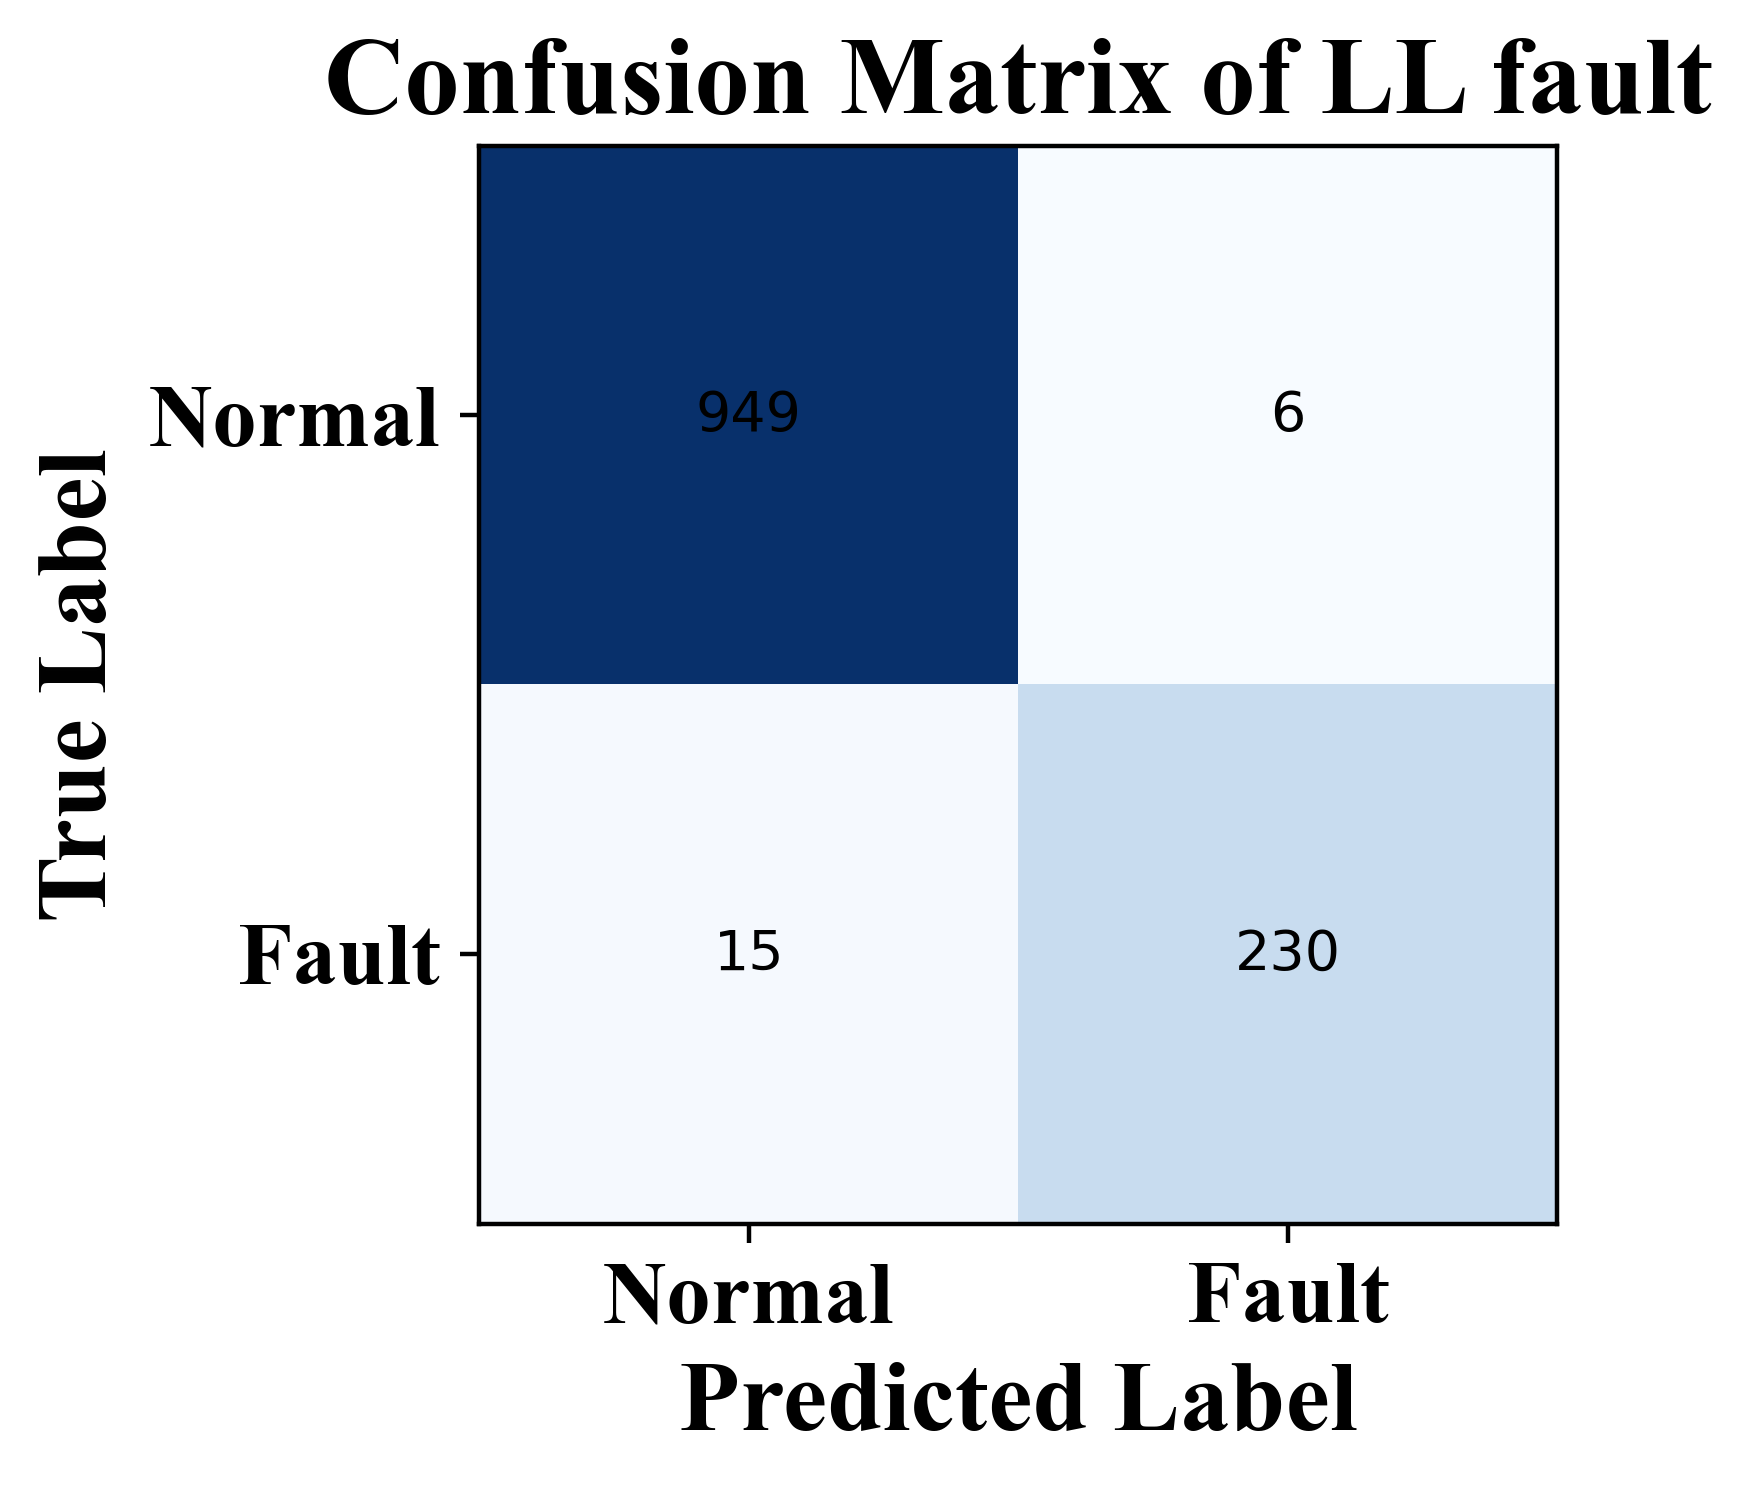

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/LLL-G.csv')

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Set font properties to Times New Roman
font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size = 16)  # Specify the path to Times New Roman font file
plt.rcParams['font.family'] = font_prop.get_name()

# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 3.5), dpi=400)
plt.imshow(conf_mat, cmap='Blues', interpolation='nearest')

for i in range (conf_mat.shape[0]):
  for j in range (conf_mat.shape[1]):
      plt.text(j, i, conf_mat[i, j], ha='center', va='center', color='black', fontsize=10)
plt.title('Confusion Matrix of LL fault', fontproperties=font_prop, fontsize = 20)

plt.xlabel('Predicted Label', fontproperties=font_prop, fontsize = 18)
plt.ylabel('True Label', fontproperties=font_prop, fontsize = 18)
plt.xticks([0, 1], ['Normal', 'Fault'], fontproperties=font_prop, fontsize = 16)
plt.yticks([0, 1], ['Normal', 'Fault'], fontproperties=font_prop, fontsize = 16)
plt.show()

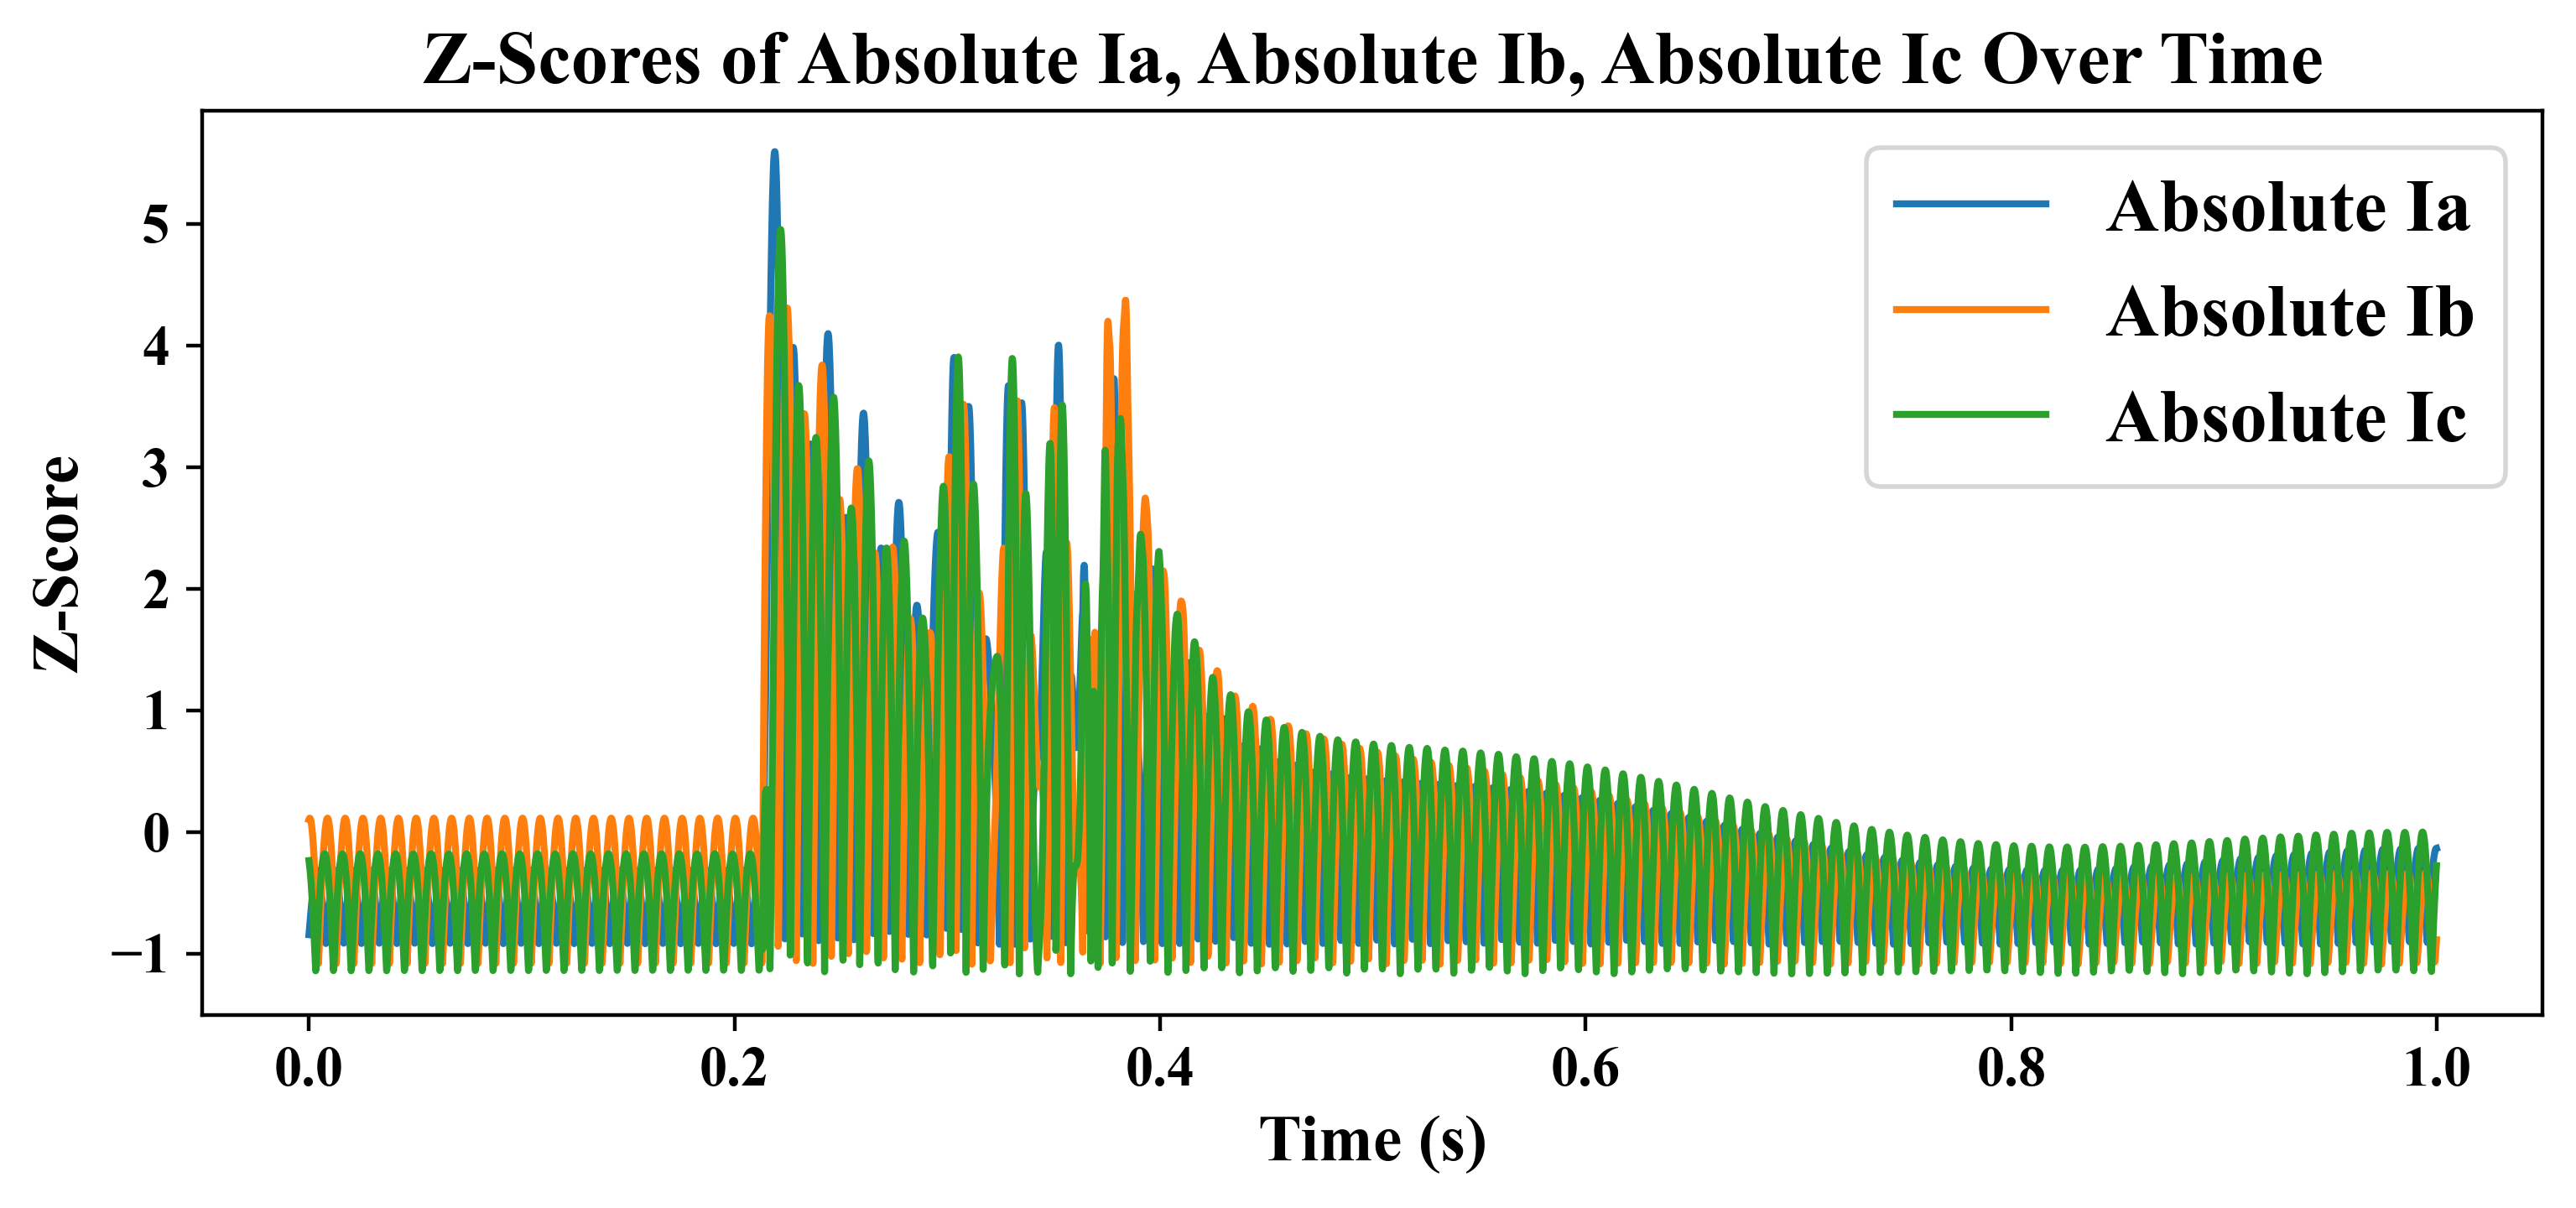

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties

# Set font properties to Times New Roman
font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)
plt.rcParams['font.family'] = font_prop.get_name()

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Fault_dataset/LLL-G.csv')

# Apply the StandardScaler to the full dataset
scaler = StandardScaler()
df[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']] = scaler.fit_transform(df[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']])

# Add the Time column and extract z-scores with timestamps
z_scores_with_time = df[['Time', 'Absolute Ia', 'Absolute Ib', 'Absolute Ic']]

# Plot the z-scores for Absolute Ia, Ib, and Ic over Time
plt.figure(figsize=(9, 3.5), dpi=400)
plt.plot(z_scores_with_time['Time'], z_scores_with_time['Absolute Ia'], label='Absolute Ia')
plt.plot(z_scores_with_time['Time'], z_scores_with_time['Absolute Ib'], label='Absolute Ib')
plt.plot(z_scores_with_time['Time'], z_scores_with_time['Absolute Ic'], label='Absolute Ic')

# Add labels and title
plt.xlabel('Time (s)', fontproperties=font_prop, fontsize=14)
plt.ylabel('Z-Score', fontproperties=font_prop, fontsize=14)
plt.title('Z-Scores of Absolute Ia, Absolute Ib, Absolute Ic Over Time', fontproperties=font_prop, fontsize=16)

# Set Times New Roman for x-axis and y-axis numerical values (ticks)
plt.xticks(fontproperties=font_prop, fontsize=12)
plt.yticks(fontproperties=font_prop, fontsize=12)

# Add legend
plt.legend(prop=font_prop, fontsize=14)

# Show the plot
plt.show()


Accuracy: 0.98


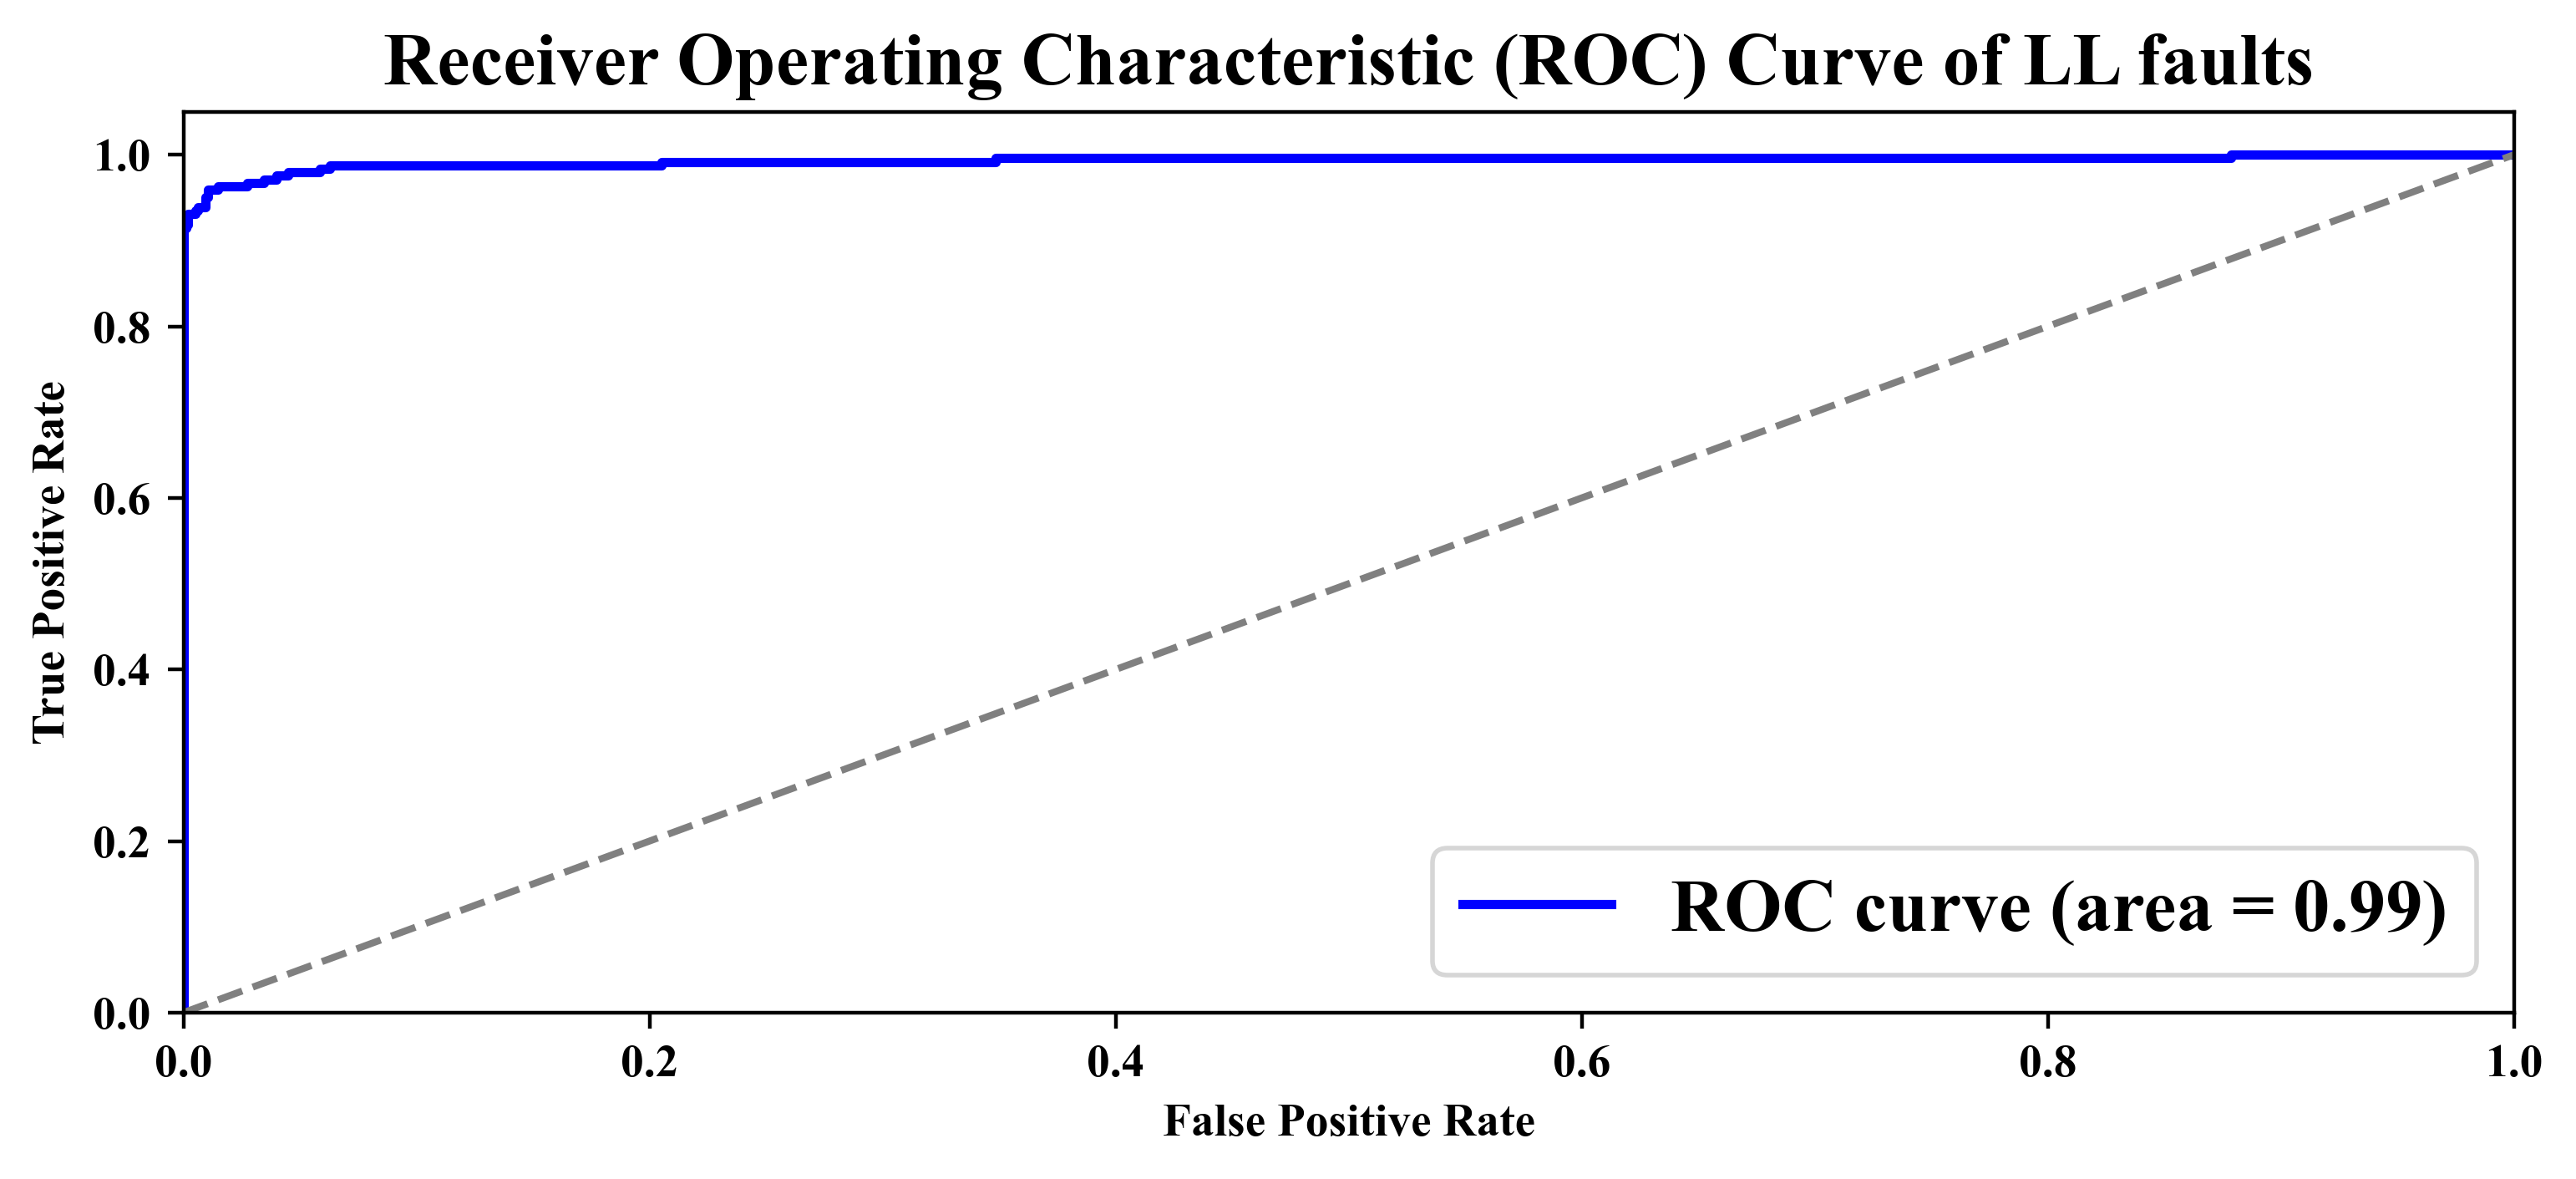

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/BC-LL modified.csv')

# Convert categorical labels to binary labels
data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

plt.rcParams['font.family'] = font_prop.get_name()

numerical_font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=10)

# Plot ROC Curve
y_probs = mlp.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(9, 3.5), dpi=400)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontproperties=numerical_font_prop)
plt.ylabel('True Positive Rate', fontproperties=numerical_font_prop)
plt.xticks(fontproperties=numerical_font_prop)
plt.yticks(fontproperties=numerical_font_prop)
plt.title('Receiver Operating Characteristic (ROC) Curve of LL faults', fontproperties=font_prop)
plt.legend(loc='lower right', prop=font_prop)
plt.show()


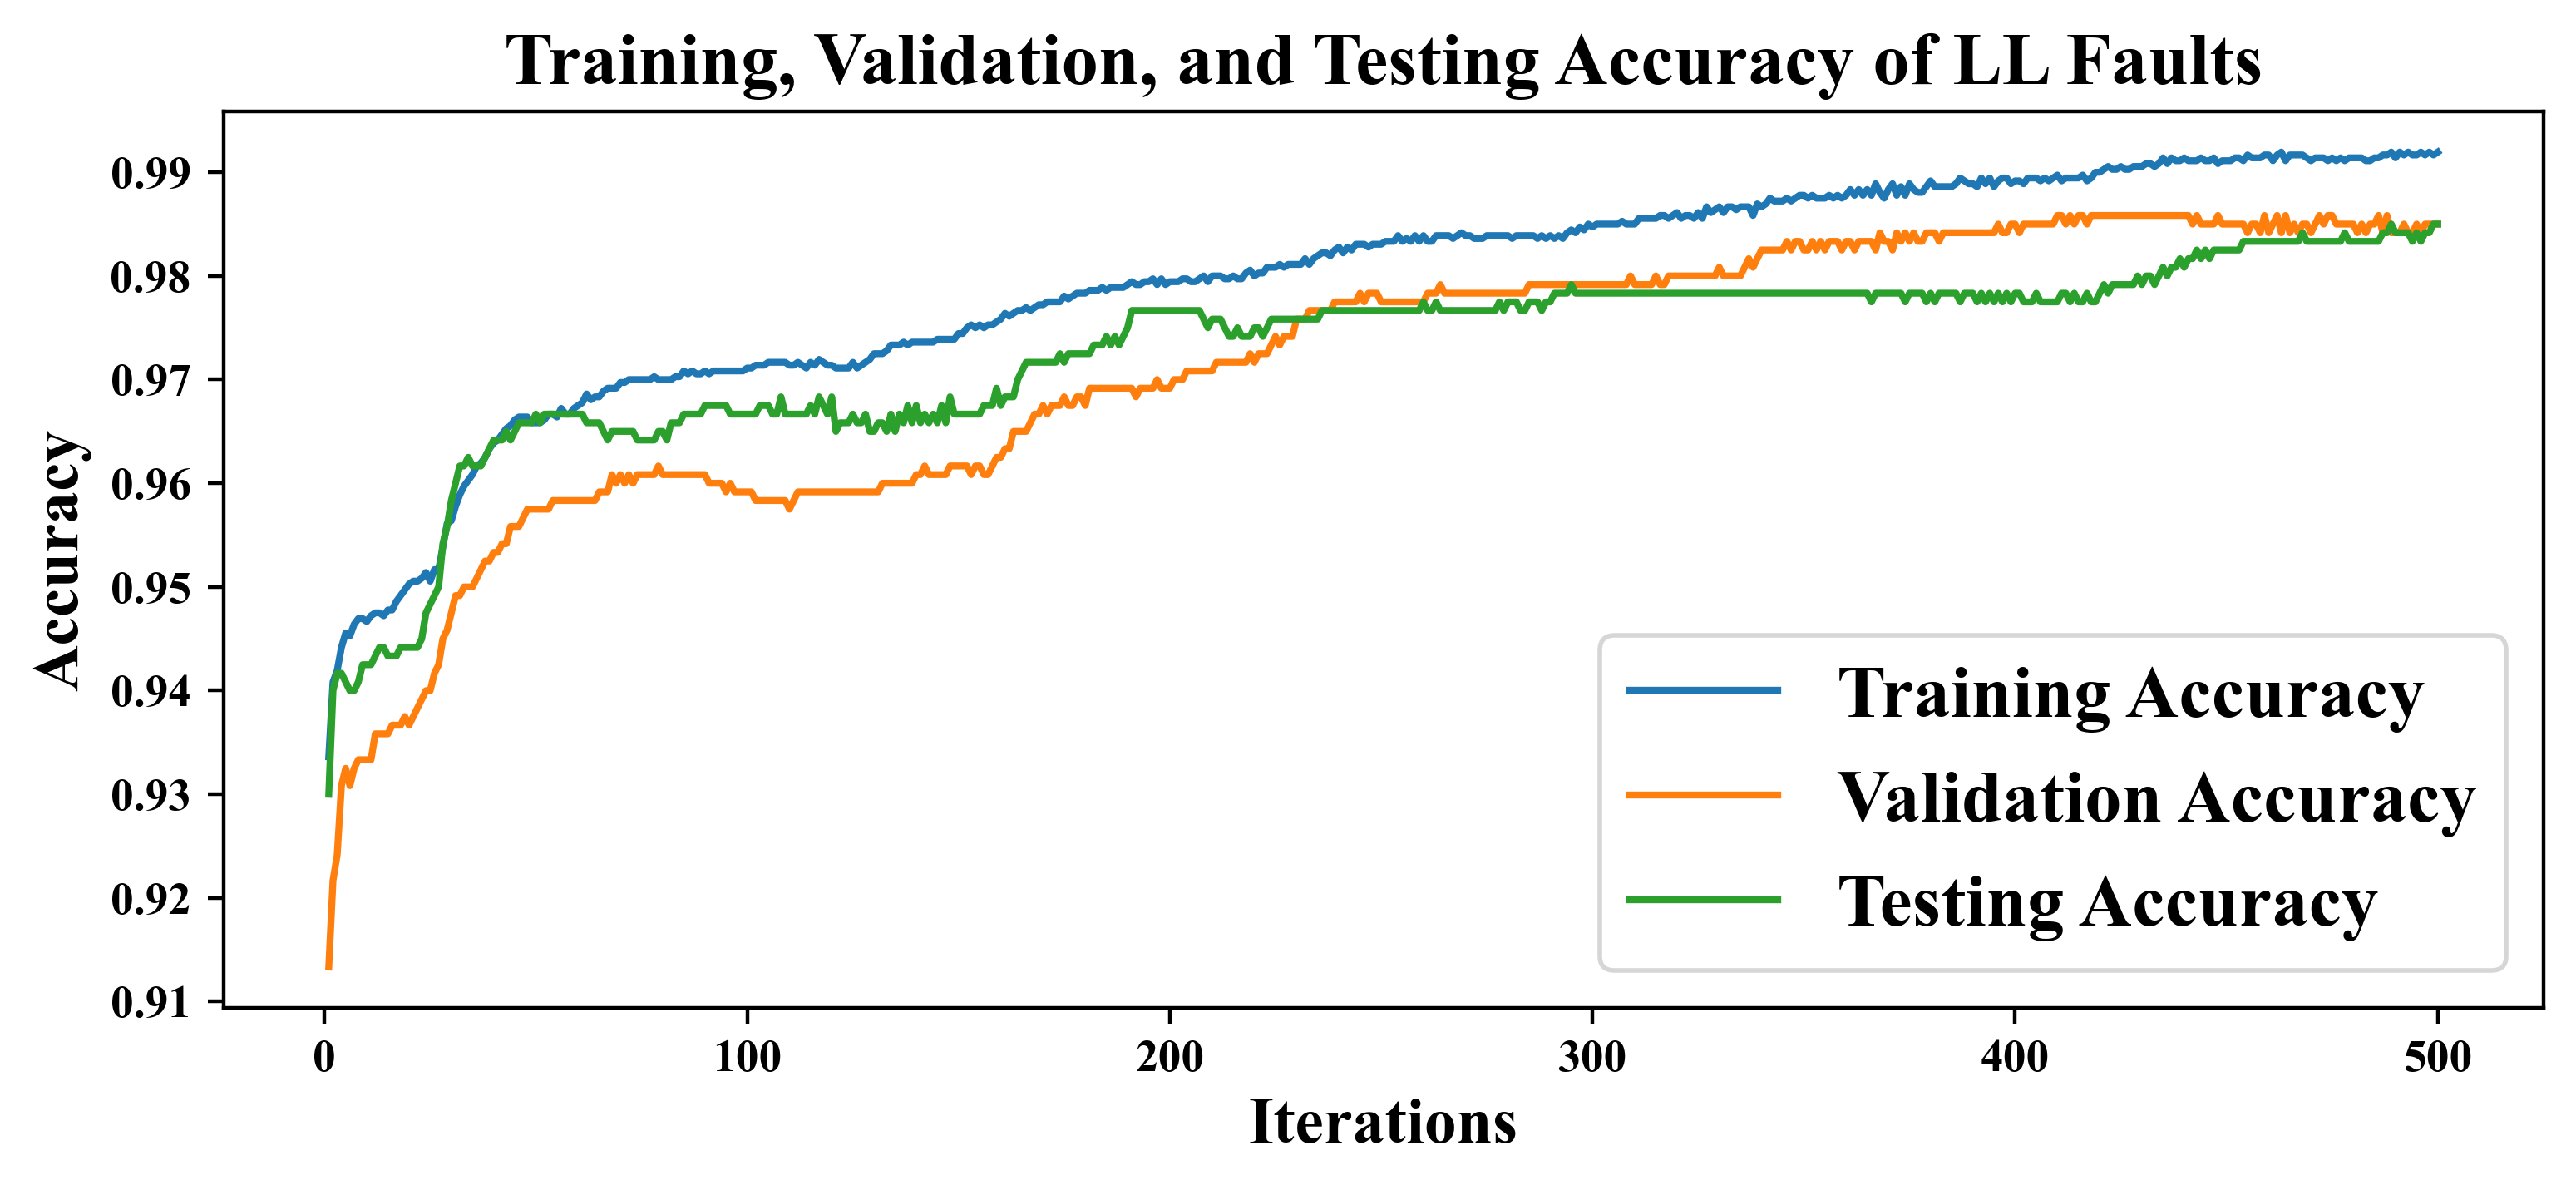

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/BC-LL modified.csv')

# Convert categorical labels to binary labels
data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 60% train, 20% validation

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Track training, validation, and testing accuracy during training
train_accuracy = []
val_accuracy = []
test_accuracy = []

# Train the model and track accuracy at each iteration
for i in range(1, 501):  # 500 iterations as per max_iter in MLPClassifier
    mlp.partial_fit(X_train_scaled, y_train, classes=[0, 1])

    # Calculate accuracy on training set
    y_train_pred = mlp.predict(X_train_scaled)
    train_accuracy.append(accuracy_score(y_train, y_train_pred))

    # Calculate accuracy on validation set
    y_val_pred = mlp.predict(X_val_scaled)
    val_accuracy.append(accuracy_score(y_val, y_val_pred))

    # Calculate accuracy on testing set
    y_test_pred = mlp.predict(X_test_scaled)
    test_accuracy.append(accuracy_score(y_test, y_test_pred))


font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)  # Specify the path to Times New Roman font file
plt.rcParams['font.family'] = font_prop.get_name()

numerical_tick_font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=10)
label_font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=14)  # Specify the font for labels

# Plotting the training, validation, and testing accuracy
plt.figure(figsize=(9, 3.5), dpi=400)
plt.plot(range(1, 501), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 501), val_accuracy, label='Validation Accuracy')
plt.plot(range(1, 501), test_accuracy, label='Testing Accuracy')
plt.xlabel('Iterations', fontproperties=label_font_prop)
plt.ylabel('Accuracy', fontproperties=label_font_prop)
plt.title('Training, Validation, and Testing Accuracy of LL Faults', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.xticks(fontproperties=numerical_tick_font_prop)
plt.yticks(fontproperties=numerical_tick_font_prop)
plt.show()


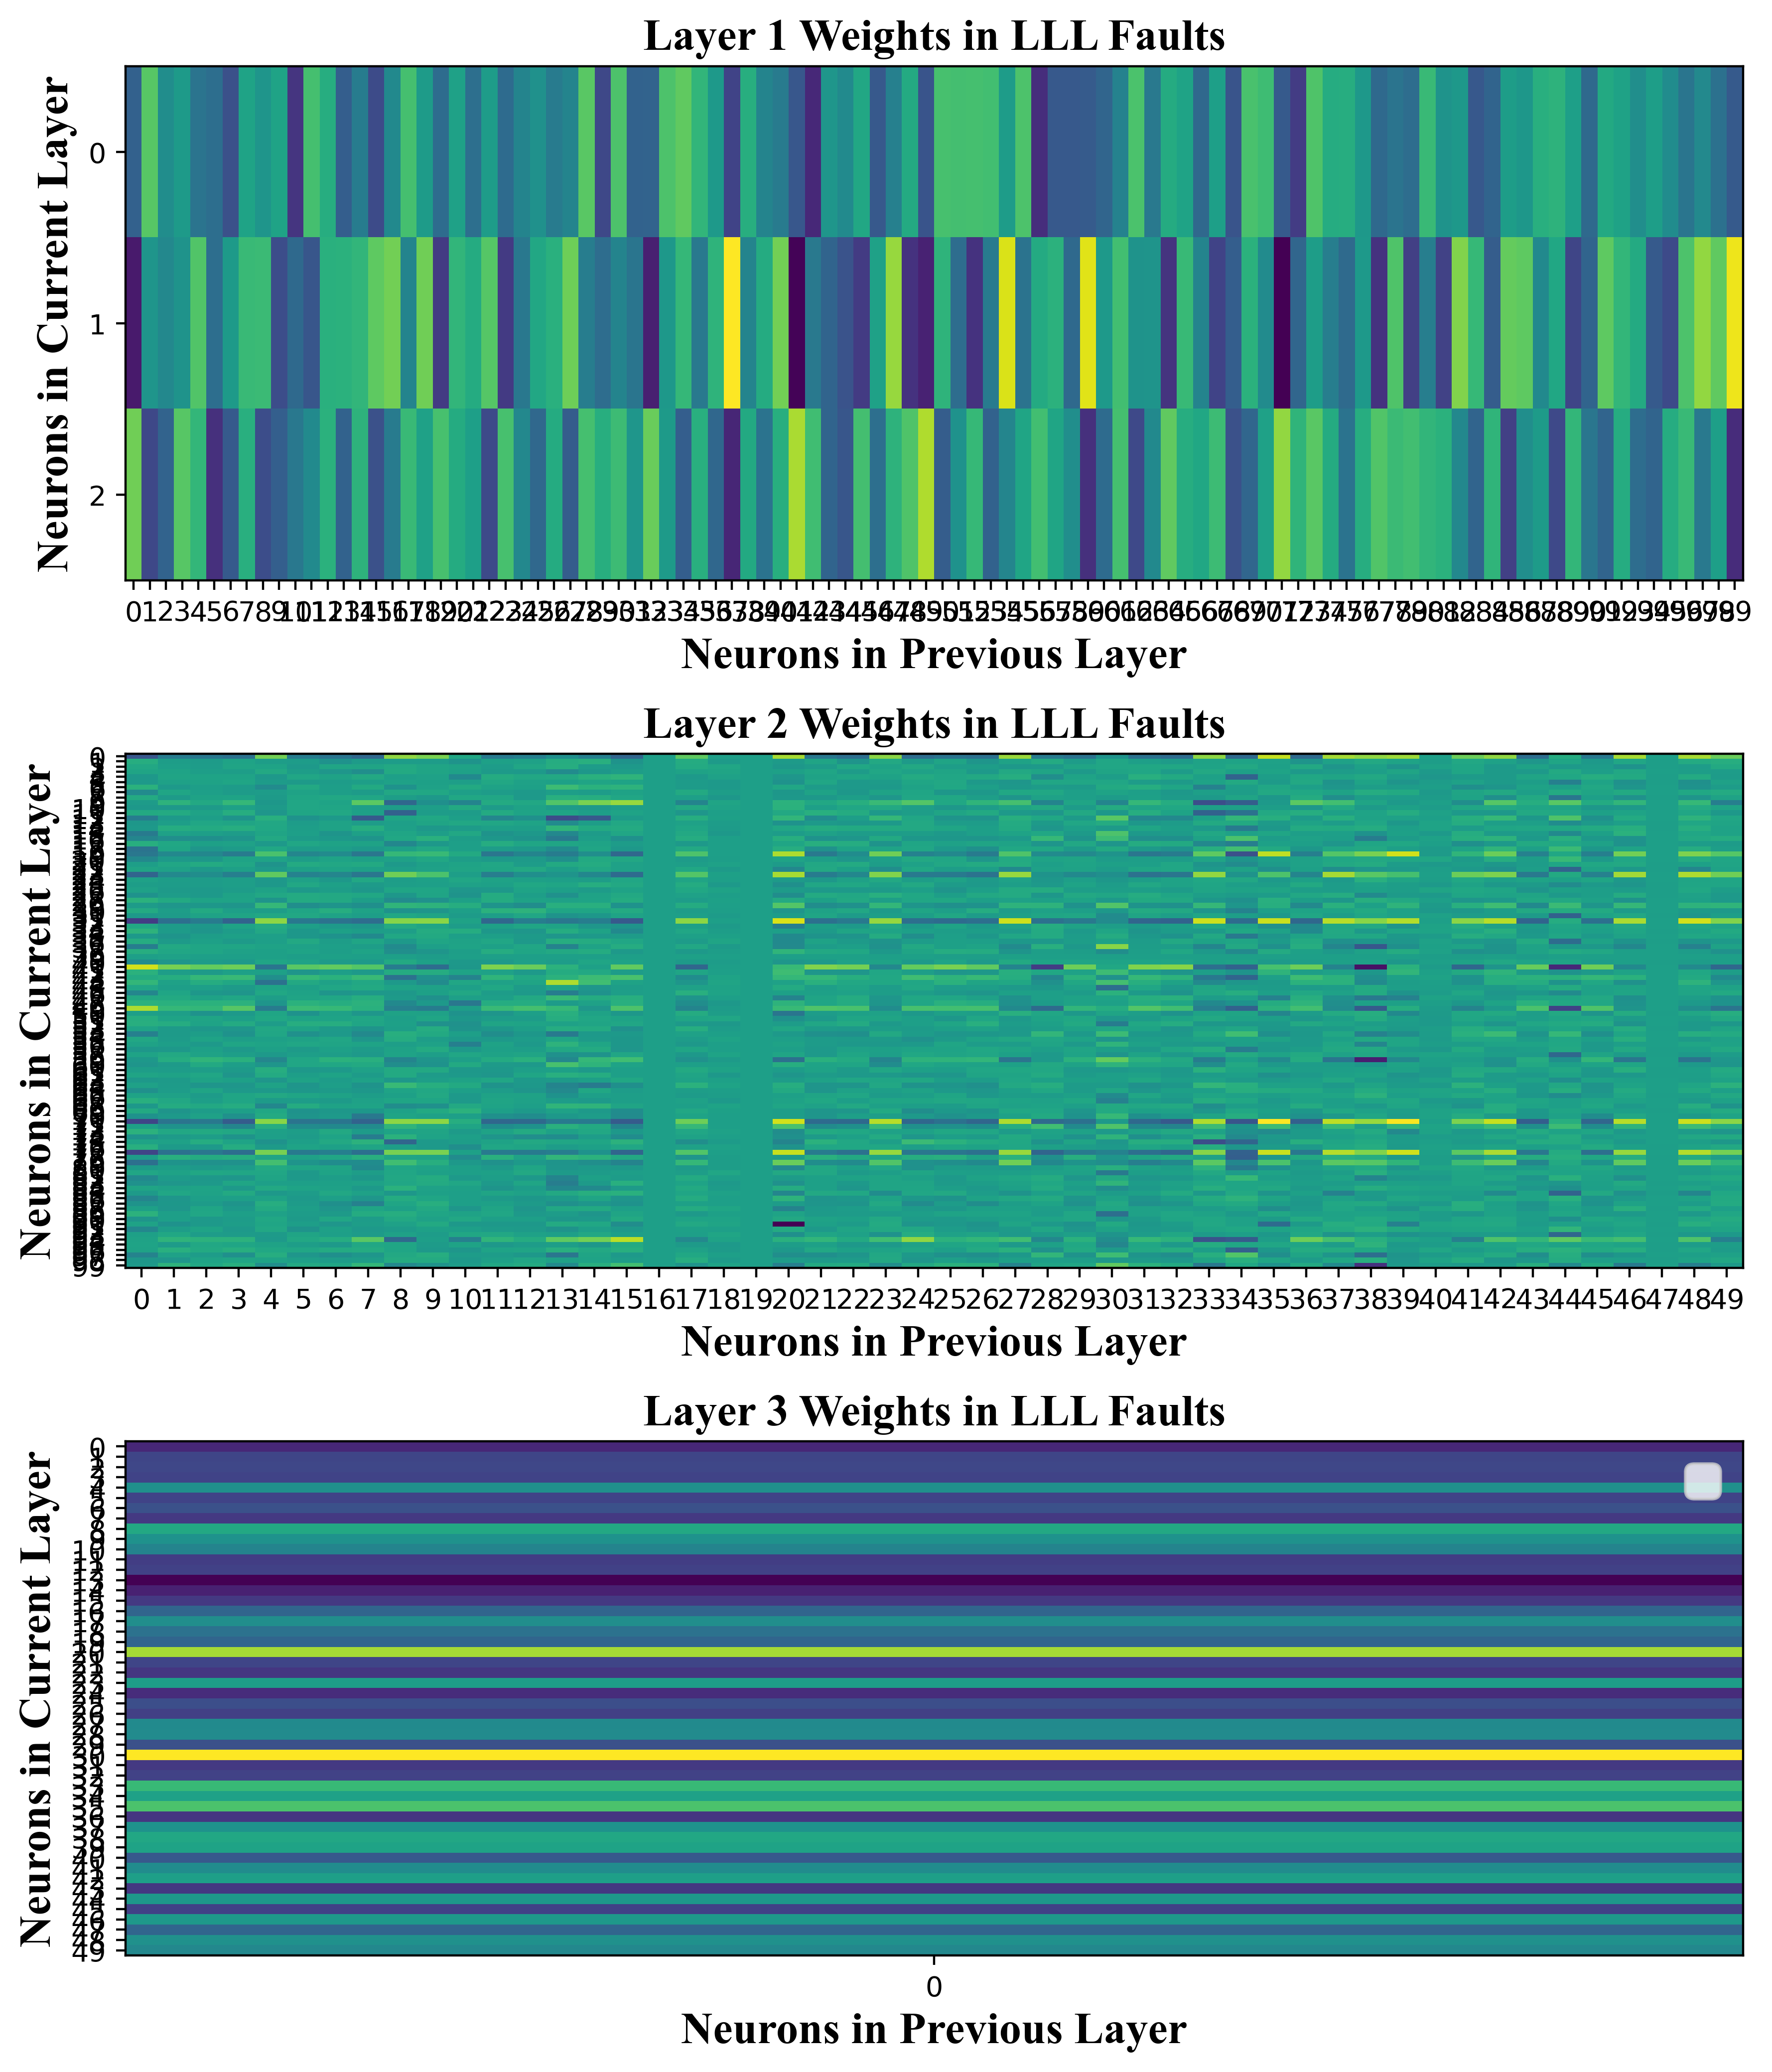

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/BC-LL modified.csv')

data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)  # Specify the path to Times New Roman font file
plt.rcParams['font.family'] = font_prop.get_name()
numerical_tick_font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=10)



# Plotting the weights in each hidden layer
fig, axs = plt.subplots(nrows=len(mlp.coefs_), figsize=(9, 3.5 * len(mlp.coefs_)), dpi=400)

for i, coef in enumerate(mlp.coefs_):
    ax = axs[i] if len(mlp.coefs_) > 1 else axs
    ax.imshow(coef, cmap='viridis', aspect='auto')
    ax.set_title(f'Layer {i+1} Weights in LLL Faults', fontproperties=font_prop)
    ax.set_xlabel('Neurons in Previous Layer', fontproperties=font_prop)
    ax.set_ylabel('Neurons in Current Layer', fontproperties=font_prop)
    plt.legend(prop=font_prop)
    ax.set_xticks(np.arange(coef.shape[1]), )
    ax.set_yticks(np.arange(coef.shape[0]))
    ax.grid(False)

plt.tight_layout()
plt.show()


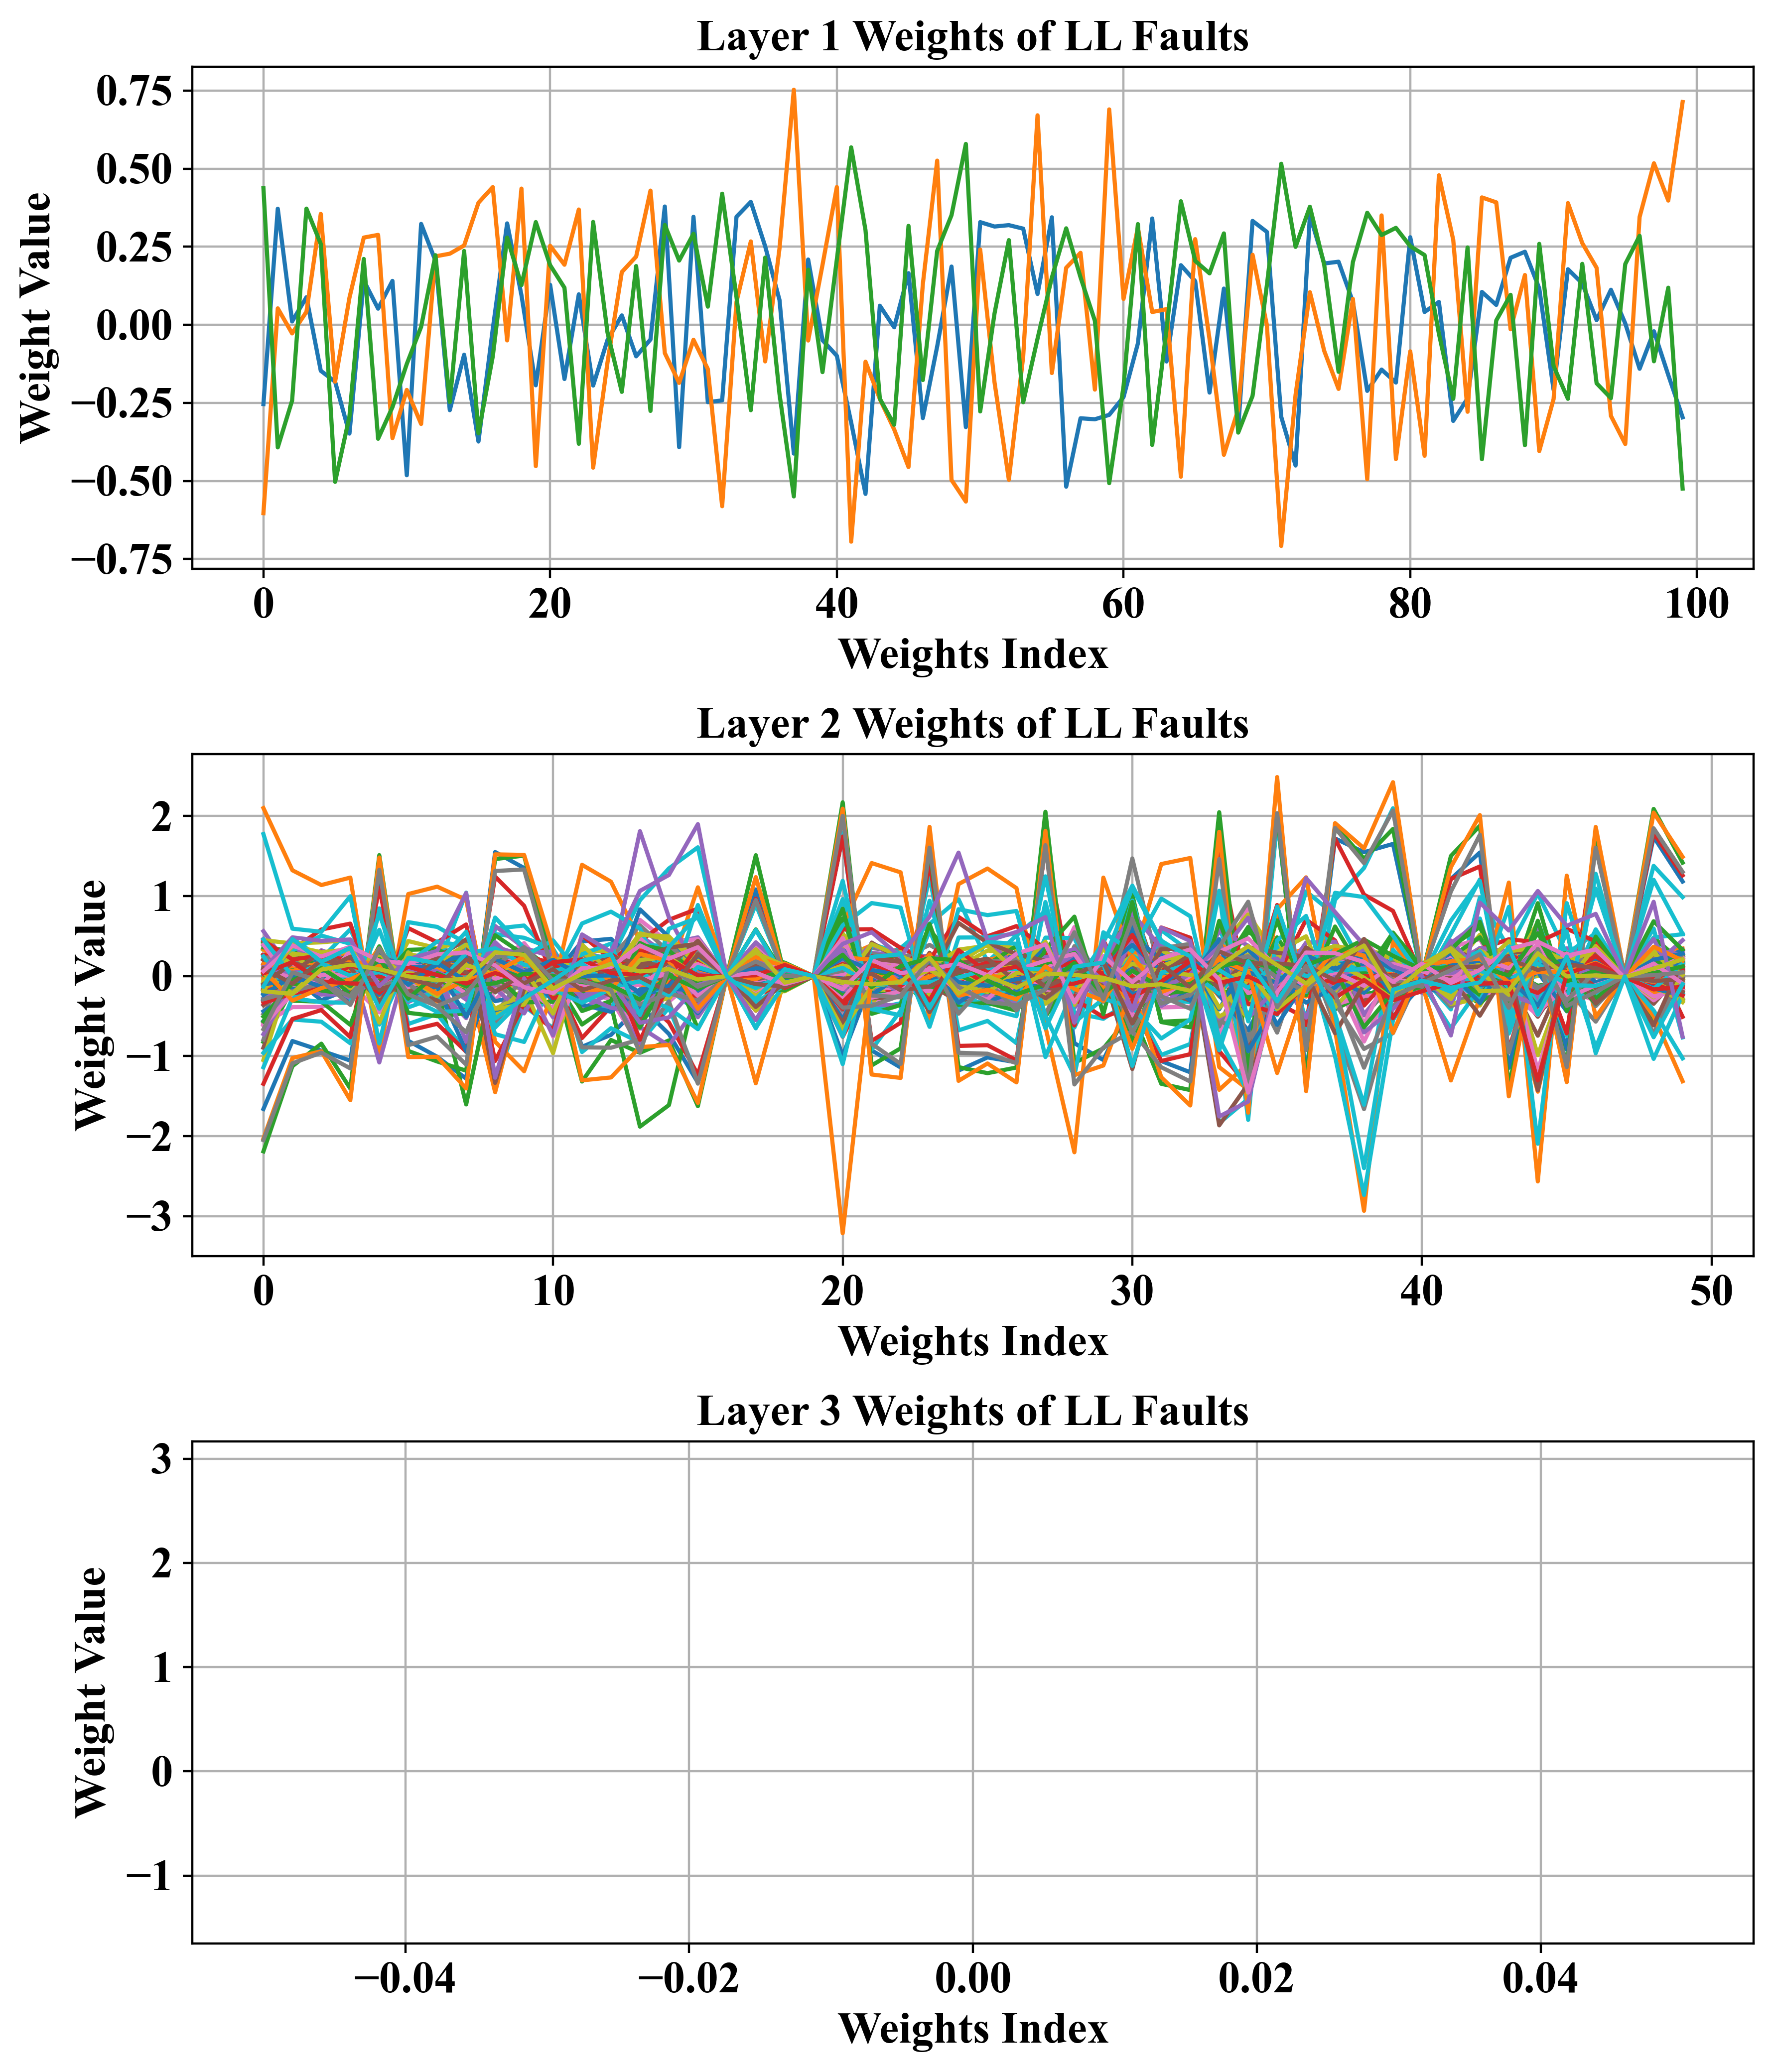

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/BC-LL modified.csv')

data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

# Plotting the weights in each hidden layer as line curves
fig, axs = plt.subplots(nrows=len(mlp.coefs_), figsize=(9, 3.5 * len(mlp.coefs_)), dpi=400)

for i, coef in enumerate(mlp.coefs_):
    ax = axs[i] if len(mlp.coefs_) > 1 else axs
    for neuron_weights in coef:
        ax.plot(neuron_weights)
    ax.set_title(f'Layer {i+1} Weights of LL Faults', fontproperties=font_prop)
    ax.set_xlabel('Weights Index', fontproperties=font_prop)
    ax.set_ylabel('Weight Value', fontproperties=font_prop)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=12)  # Set font size for tick labels

# Set font properties for tick labels on both axes
for ax in axs.flat:
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop)

plt.tight_layout()
plt.show()


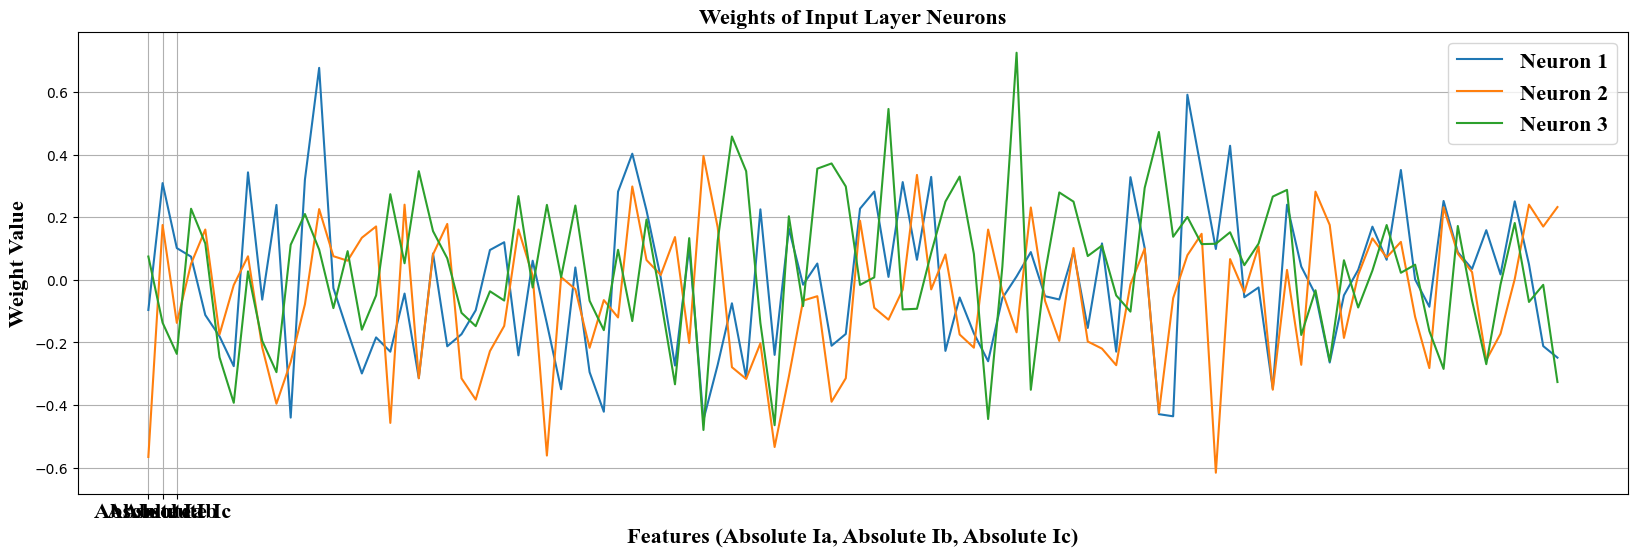

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

# Load the dataset
data = pd.read_csv('/content/LLL-G.csv')

data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Plotting the weights of input layer neurons
input_layer_weights = mlp.coefs_[0]  # Get weights of the input layer (first layer)

plt.figure(figsize=(20, 6))
plt.plot(input_layer_weights.T)  # Transpose for easier plotting
plt.xlabel('Features (Absolute Ia, Absolute Ib, Absolute Ic)', fontproperties=font_prop)
plt.ylabel('Weight Value', fontproperties=font_prop)
plt.title('Weights of Input Layer Neurons', fontproperties=font_prop)
plt.xticks(np.arange(3), X.columns, fontproperties=font_prop)  # Set x-axis labels as feature names
plt.grid(True)
plt.legend(['Neuron 1', 'Neuron 2', 'Neuron 3'], loc='upper right', prop=font_prop)
plt.show()


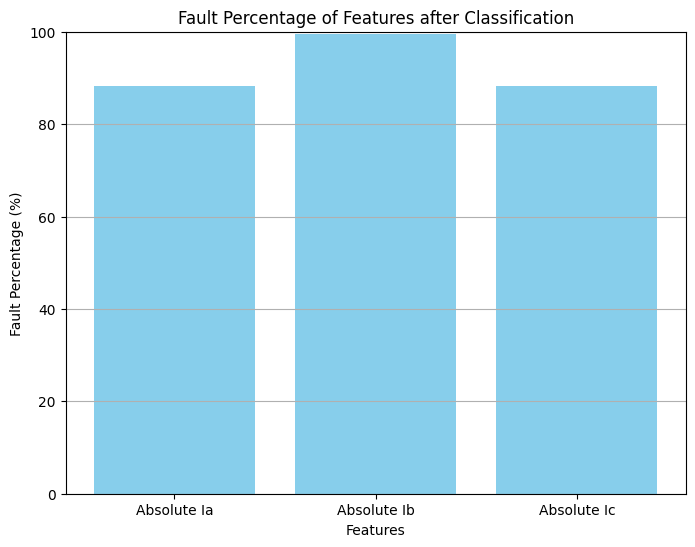

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/LLL-G.csv')

data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Get predictions on the test set
y_pred = mlp.predict(X_test_scaled)

# Calculate the fault percentage for each feature
fault_percentage_ia = sum(y_test[y_test == 1] == y_pred[y_test == 1]) / sum(y_test == 1) * 100
fault_percentage_ib = sum(y_test[y_test == 0] == y_pred[y_test == 0]) / sum(y_test == 0) * 100
fault_percentage_ic = sum(y_test[y_test == 1] == y_pred[y_test == 1]) / sum(y_test == 1) * 100

# Plot the fault percentage for each feature
plt.figure(figsize=(8, 6))
plt.bar(['Absolute Ia', 'Absolute Ib', 'Absolute Ic'], [fault_percentage_ia, fault_percentage_ib, fault_percentage_ic], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Fault Percentage (%)')
plt.title('Fault Percentage of Features after Classification')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()


Mean Squared Error (Filtered): 0.01


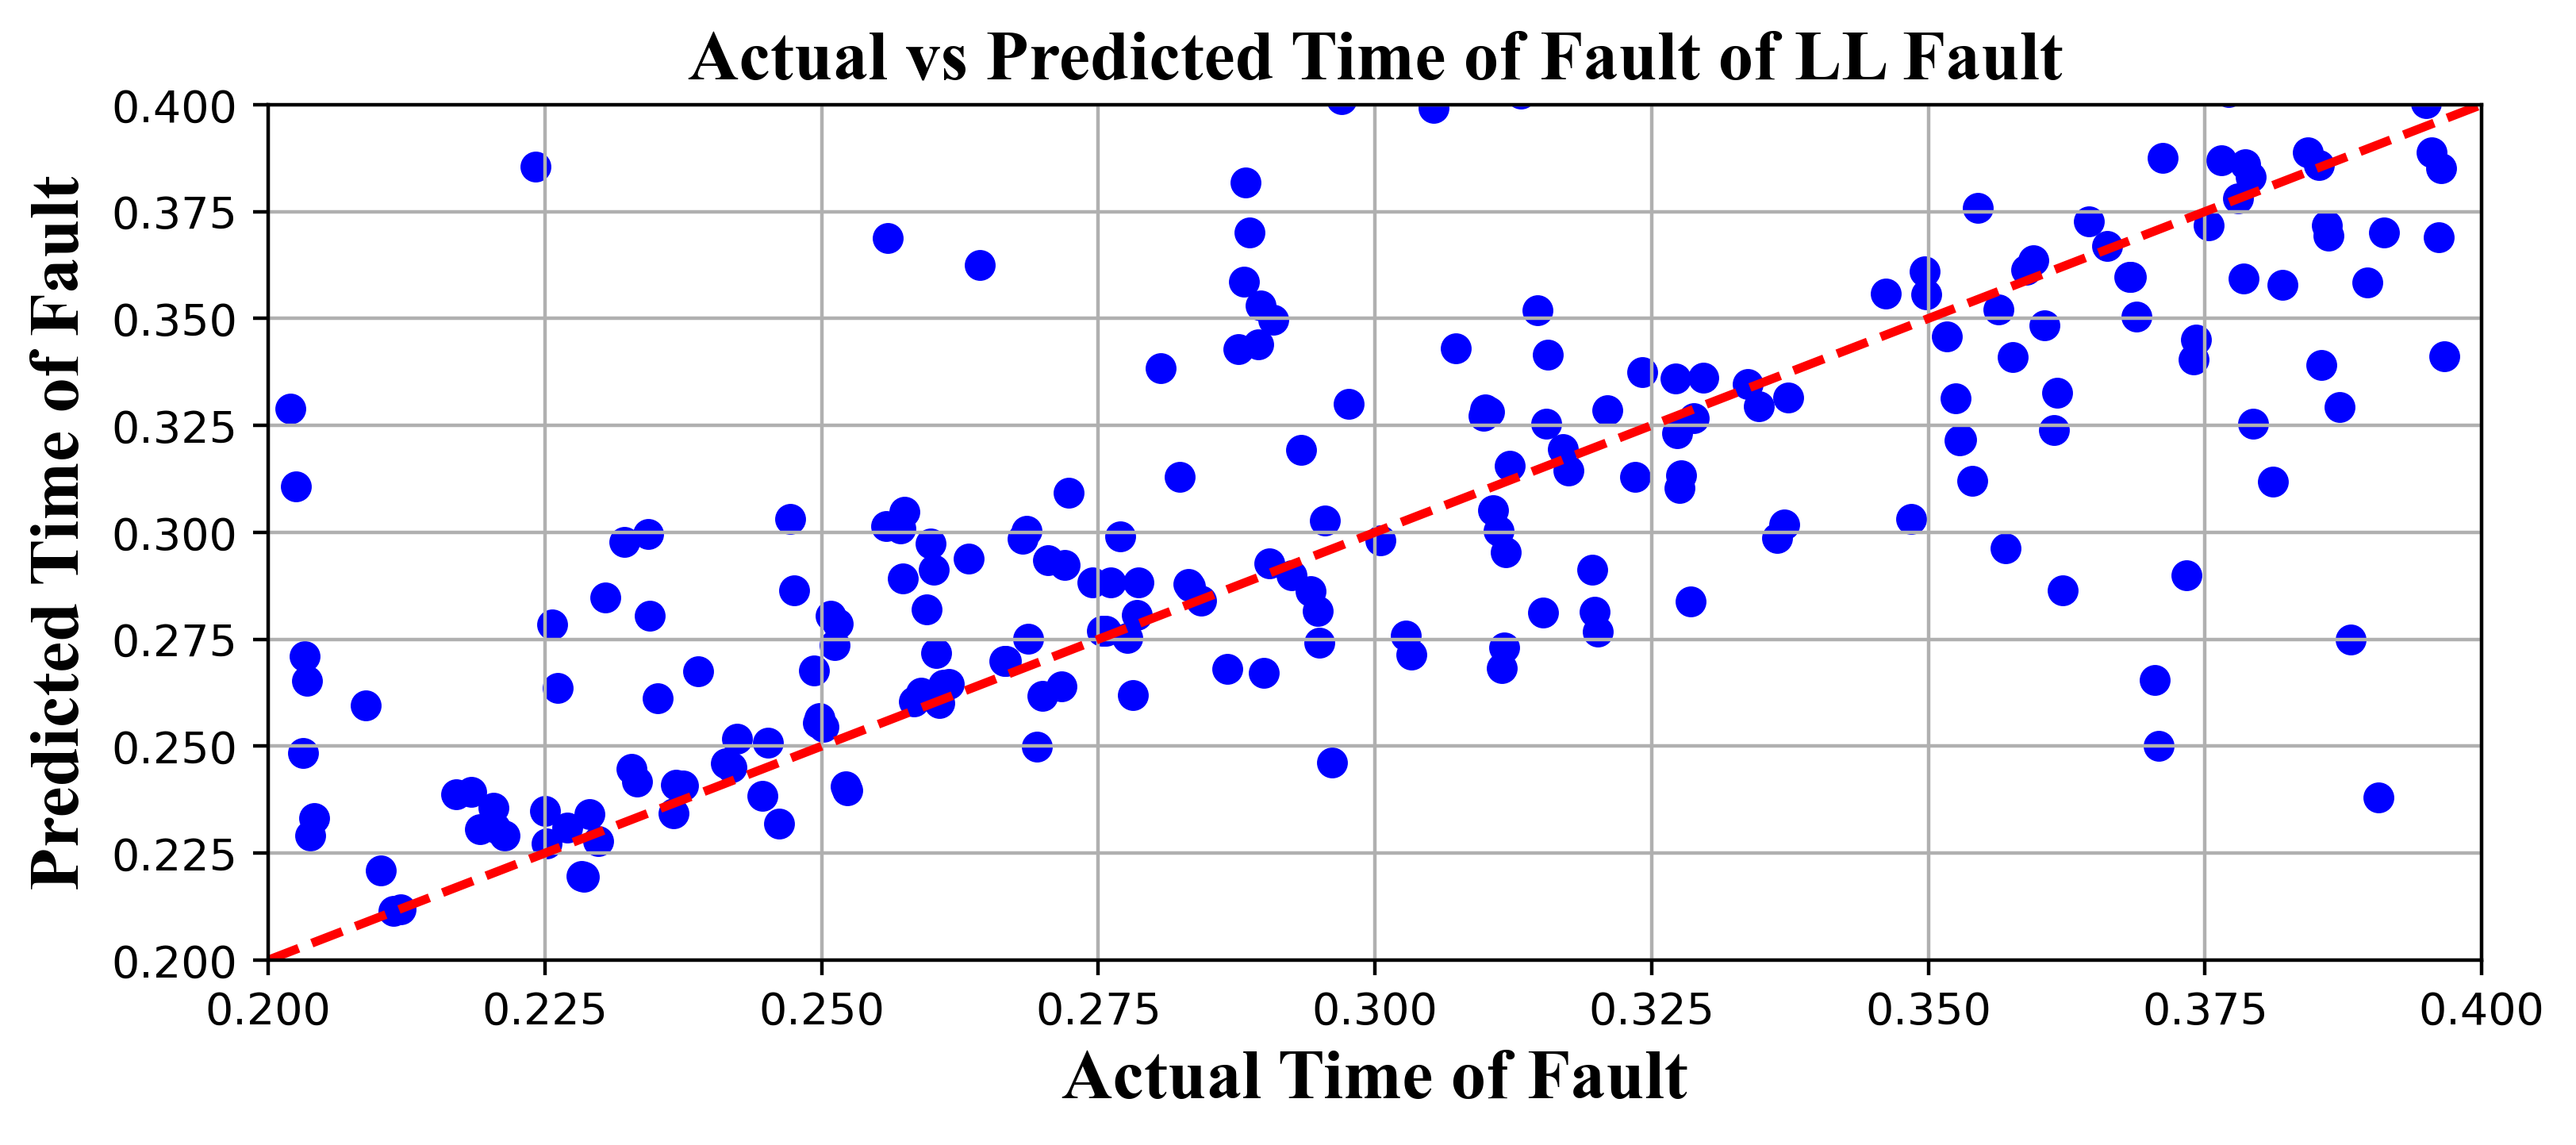

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/BC-LL modified.csv')

# Separate features and target variable (time of fault)
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Time']  # Assuming 'Time_of_Fault' is the column name for time

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Filter data for the region 0.2 to 0.4
mask = (y_test >= 0.2) & (y_test <= 0.4)
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

# Calculate Mean Squared Error (MSE) for the filtered data
mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
print(f'Mean Squared Error (Filtered): {mse_filtered:.2f}')

# Set the Times New Roman font for text and numerical values
plt.rcParams['font.family'] = 'Times New Roman'
font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

# Plot actual vs predicted values for the filtered region
plt.figure(figsize=(9, 3.5), dpi=400)
plt.scatter(y_test_filtered, y_pred_filtered, color='blue')
plt.plot([0.2, 0.4], [0.2, 0.4], '--', color='red', linewidth=2)
plt.xlabel('Actual Time of Fault', fontproperties=font_prop)
plt.ylabel('Predicted Time of Fault', fontproperties=font_prop)
plt.title('Actual vs Predicted Time of Fault of LL Fault', fontproperties=font_prop)
plt.grid(True)
plt.xlim(0.2, 0.4)  # Limit x-axis to the filtered region
plt.ylim(0.2, 0.4)  # Limit y-axis to the filtered region
plt.show()


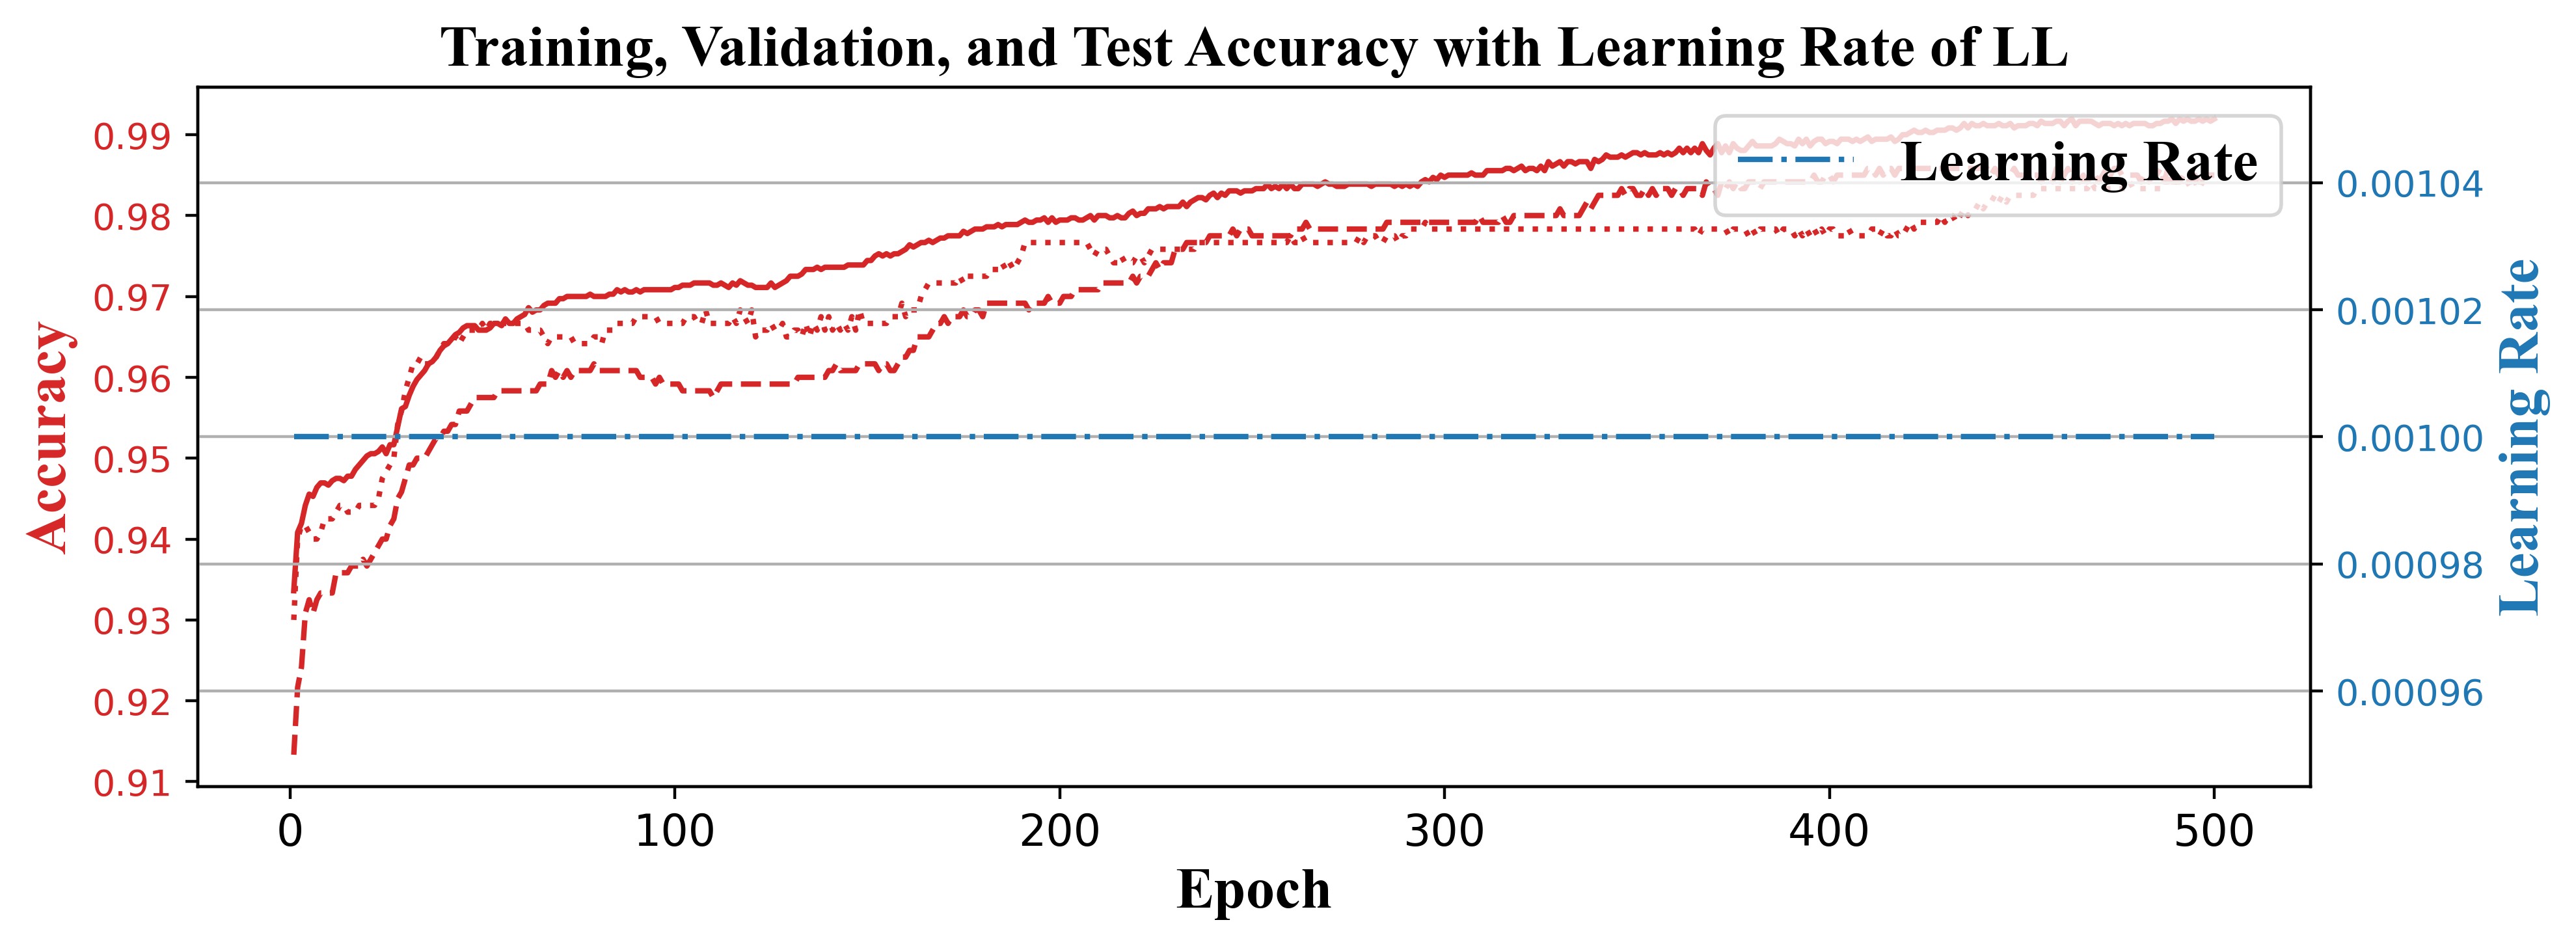

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.font_manager import FontProperties

class CustomMLPClassifier(MLPClassifier):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.learning_rates_ = []

    def _fit(self, X, y, incremental=False):
        super()._fit(X, y, incremental)
        self.learning_rates_.append(self._optimizer.learning_rate_init)

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/BC-LL modified.csv')
data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create CustomMLPClassifier model
mlp = CustomMLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Initialize lists to store accuracy values and learning rates
train_acc = []
val_acc = []
test_acc = []
learning_rates = []

# Train the model and track accuracy and learning rates at each iteration
for i in range(1, 501):  # 500 iterations as per max_iter in MLPClassifier
    mlp._fit(X_train_scaled, y_train, incremental=True)

    # Calculate accuracy on training set
    y_train_pred = mlp.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_acc.append(train_accuracy)

    # Calculate accuracy on validation set
    y_val_pred = mlp.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_acc.append(val_accuracy)

    # Calculate accuracy on test set
    y_test_pred = mlp.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_acc.append(test_accuracy)

    # Store learning rate
    learning_rates.append(mlp.learning_rates_[-1])

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

# Plotting the accuracies and learning rates
fig, ax1 = plt.subplots(figsize=(10, 3.5), dpi=400)

color = 'tab:red'
ax1.set_xlabel('Epoch', fontproperties=font_prop)
ax1.set_ylabel('Accuracy', color=color, fontproperties=font_prop)
ax1.plot(range(1, 501), train_acc, label='Training Accuracy', color=color)
ax1.plot(range(1, 501), val_acc, label='Validation Accuracy', color=color, linestyle='--')
ax1.plot(range(1, 501), test_acc, label='Test Accuracy', color=color, linestyle=':')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelsize=12, labelcolor='black')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Learning Rate', color=color, fontproperties=font_prop)
ax2.plot(range(1, 501), learning_rates, label='Learning Rate', color=color, linestyle='-.')
ax2.tick_params(axis='y', labelcolor=color)
ax2.tick_params(axis='x', labelsize=12, labelcolor='black')

fig.tight_layout()
plt.title('Training, Validation, and Test Accuracy with Learning Rate of LL', fontproperties=font_prop)
plt.grid(True)
plt.legend(prop=font_prop)
plt.show()


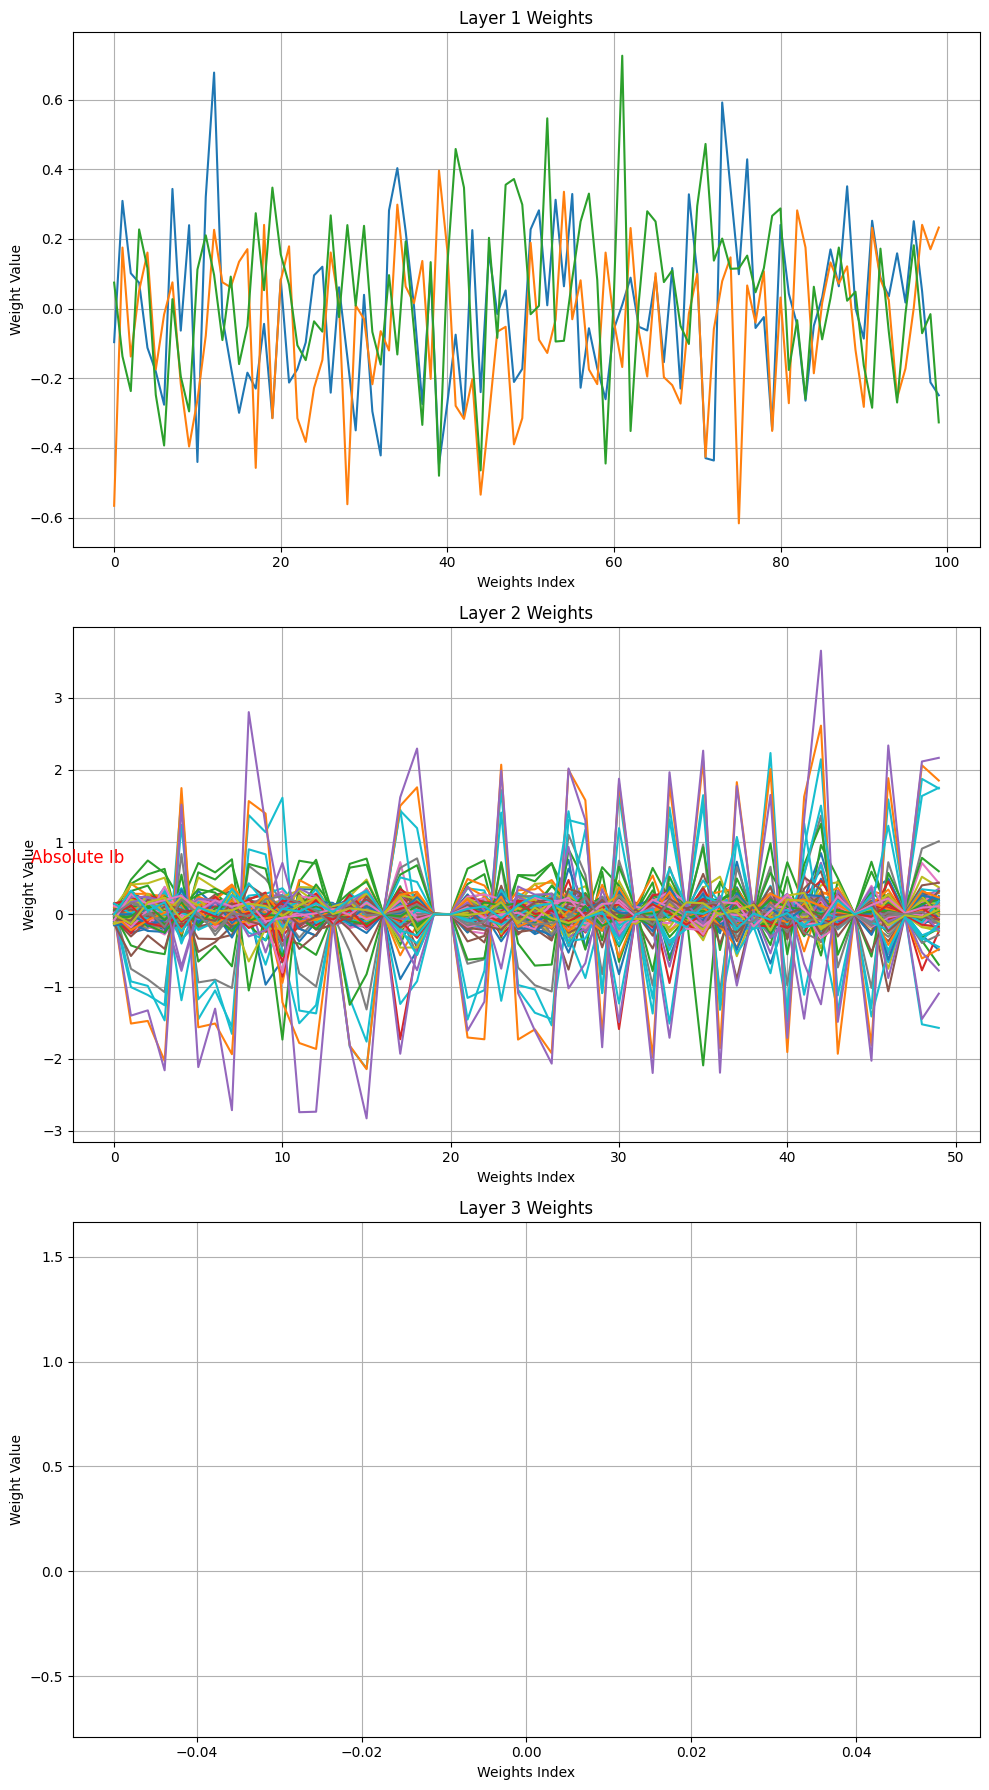

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/ABG modified.csv')

data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Plotting the weights in each hidden layer as line curves
fig, axs = plt.subplots(nrows=len(mlp.coefs_), figsize=(10, 6 * len(mlp.coefs_)))

for i, (coef, feature_name) in enumerate(zip(mlp.coefs_, X.columns)):
    ax = axs[i] if len(mlp.coefs_) > 1 else axs
    for neuron_weights in coef:
        ax.plot(neuron_weights)
    ax.set_title(f'Layer {i+1} Weights')
    ax.set_xlabel('Weights Index')
    ax.set_ylabel('Weight Value')
    ax.grid(True)

    # Add label in the top right corner
    ax.annotate(f'{feature_name}', xy=(1, 1), xytext=(-5, -5), textcoords='offset points',
                ha='right', va='top', fontsize=12, color='red')

plt.tight_layout()
plt.show()


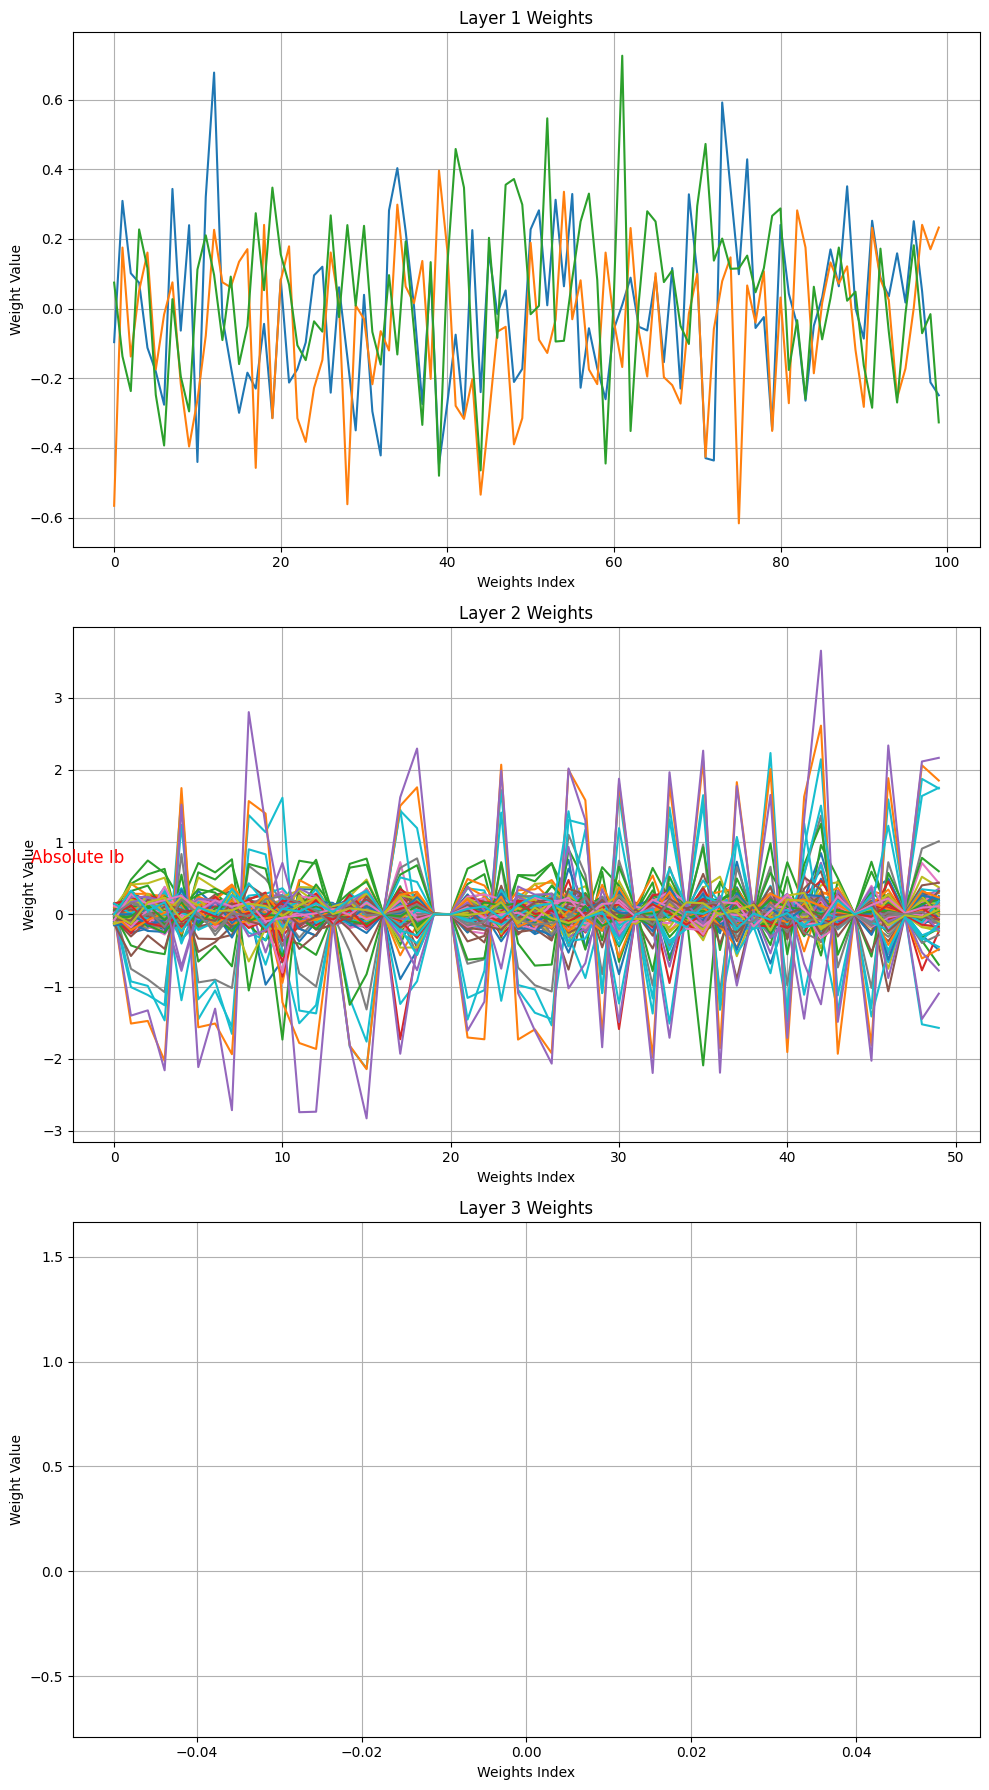

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.font_manager import FontProperties

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Fault_dataset/LLL-G.csv')

data['Fault'] = data['Fault'].map({'No': 0, 'Yes': 1})

# Separate features and target variable
X = data[['Absolute Ia', 'Absolute Ib', 'Absolute Ic']]
y = data['Fault']

# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create MLPClassifier model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

# Plotting the weights in each hidden layer as line curves
fig, axs = plt.subplots(nrows=len(mlp.coefs_), figsize=(9, 3.5 * len(mlp.coefs_)))

for i, (coef, feature_name) in enumerate(zip(mlp.coefs_, X.columns)):
    ax = axs[i] if len(mlp.coefs_) > 1 else axs
    for neuron_weights in coef:
        ax.plot(neuron_weights)
    ax.set_title(f'Layer {i+1} Weights', fontproperties=font_prop )
    ax.set_xlabel('Weights Index', fontproperties=font_prop)
    ax.set_ylabel('Weight Value', fontproperties=font_prop)
    ax.grid(True)

    # Add label in the top right corner
    ax.annotate(f'{feature_name}', xy=(1, 1), xytext=(-5, -5), textcoords='offset points',
                ha='right', va='top', fontsize=12, color='red')

plt.tight_layout()
plt.show()


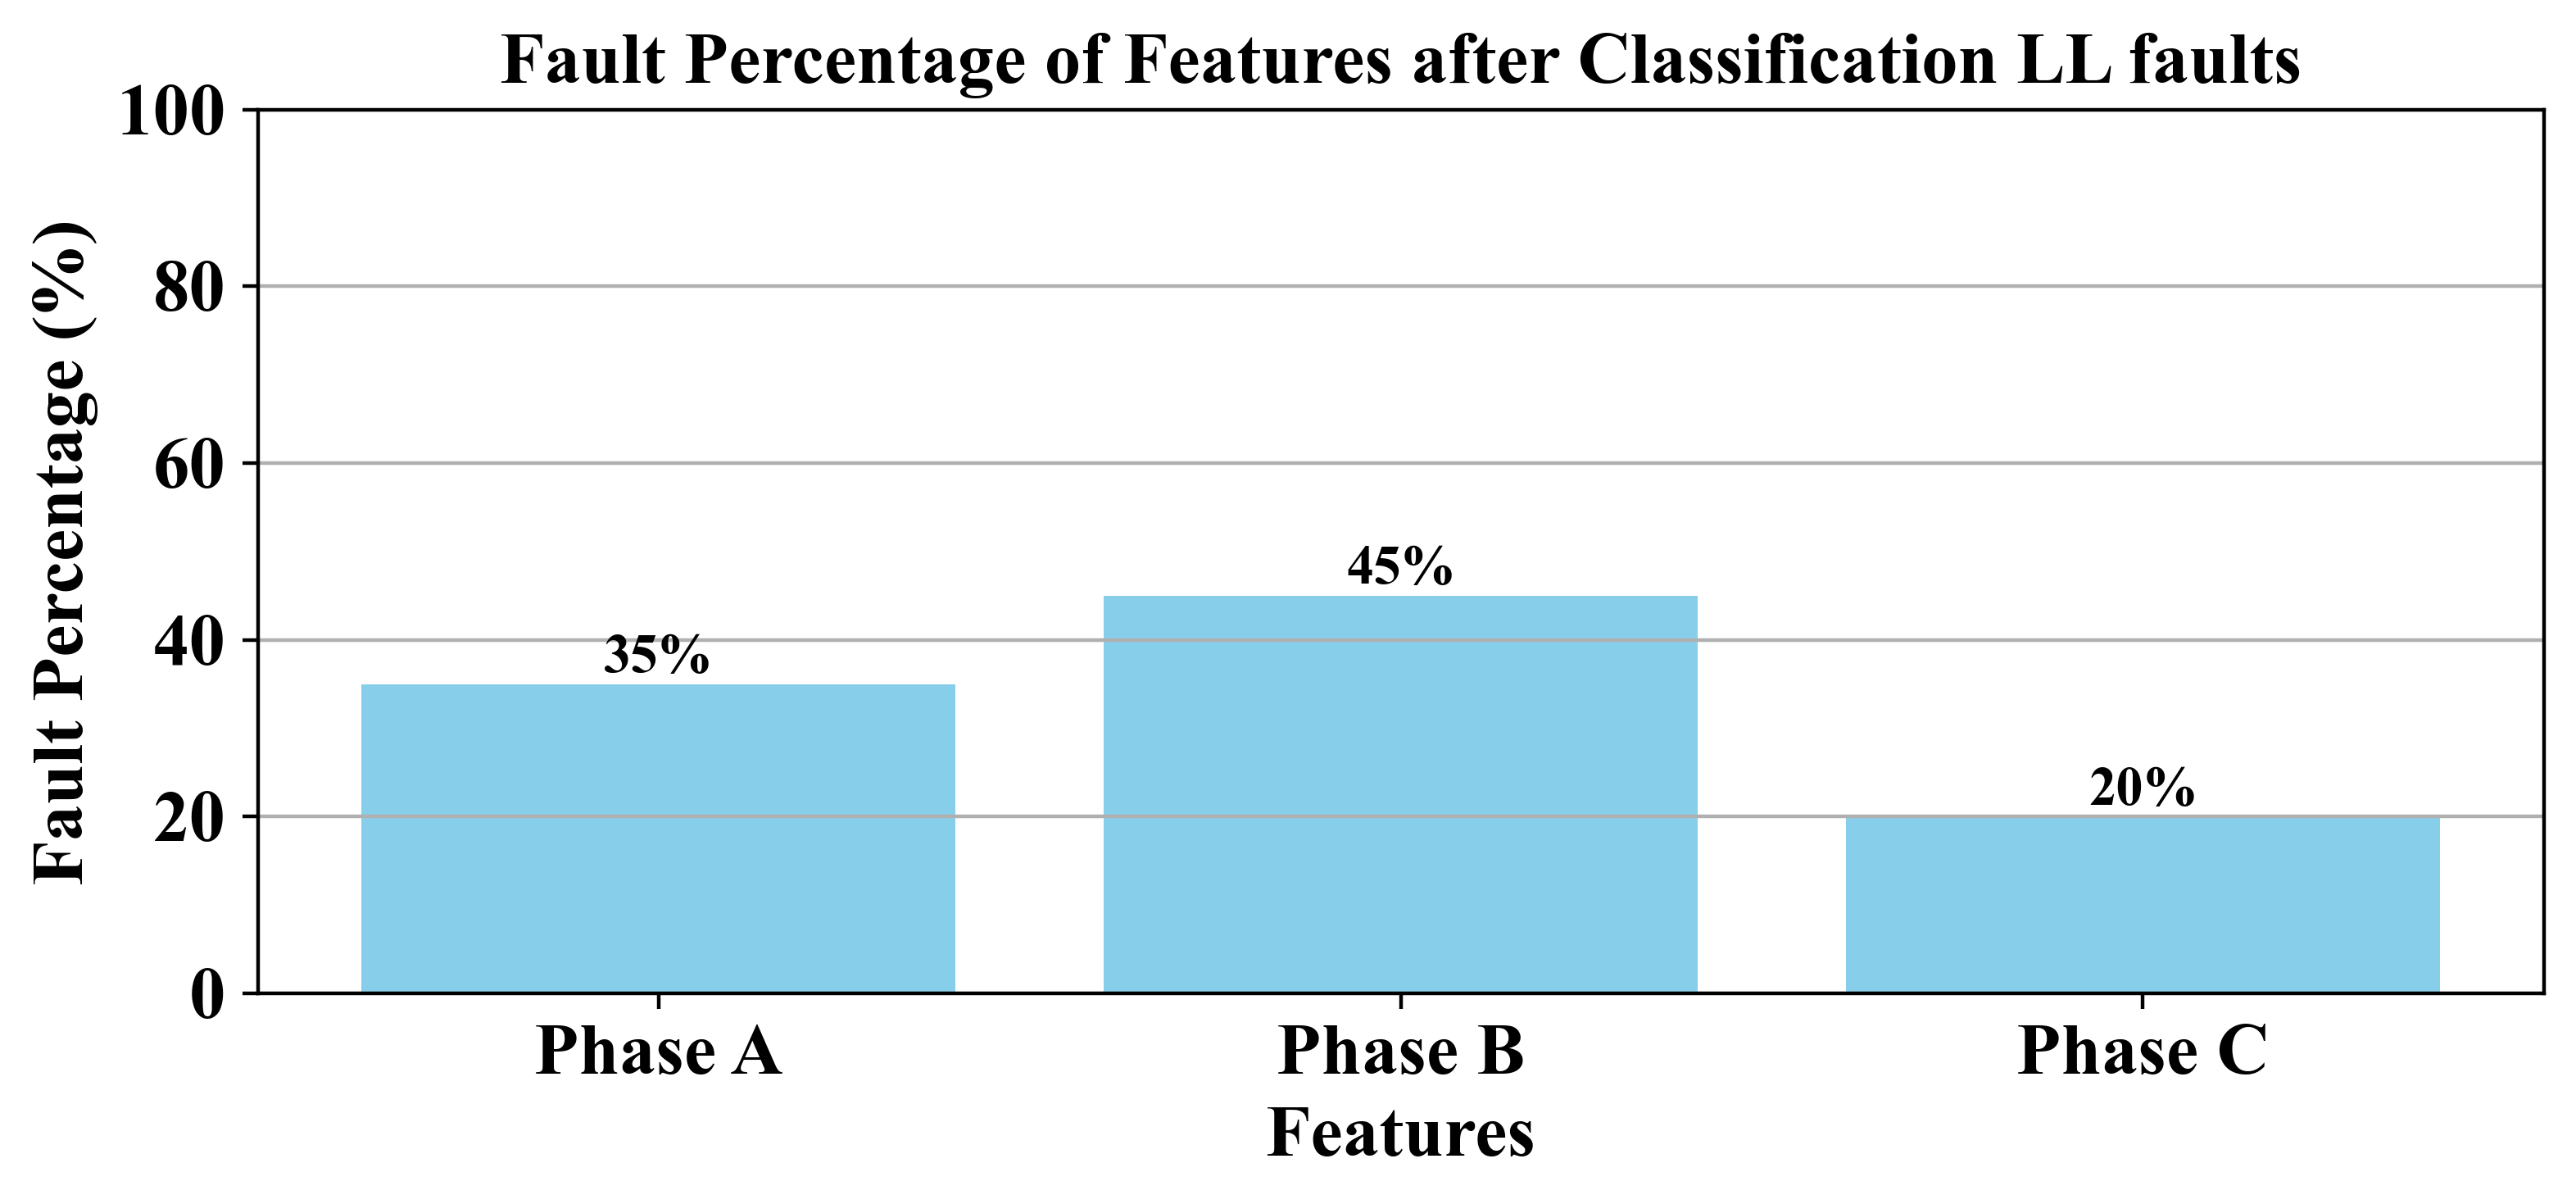

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define fault percentages
fault_percentage_ia = 35
fault_percentage_ib = 45
fault_percentage_ic = 20

font_prop = FontProperties(fname='/content/Times New Roman Bold.ttf', size=16)

# Plot the fault percentage for each feature
plt.figure(figsize=(9, 3.5), dpi=400)
bars = plt.bar(['Phase A', 'Phase B', 'Phase C'], [fault_percentage_ia, fault_percentage_ib, fault_percentage_ic], color='skyblue')

# Set font properties for axis labels
plt.xlabel('Features', fontproperties=font_prop)
plt.ylabel('Fault Percentage (%)', fontproperties=font_prop)
plt.title('Fault Percentage of Features after Classification LL faults', fontproperties=font_prop)

# Set font properties for tick labels
plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

plt.ylim(0, 100)
plt.grid(axis='y')

# Add value annotations on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval}%', va='bottom', ha='center', fontsize=12, fontproperties=font_prop)

plt.show()
